In [ ]:
#finda intersection of the two models to find final genes for every class

In [1]:
import torch
import Trainer
from network import NFM
import torch.utils.data as Data
from Utils.criteo_loader import getTestData, getTrainData

nfm_config = \
{
    'n_class':9,
    'linear_hidden1':2000,
    #'linear_hidden':100,#线性模型输出层（隐层个数）
    #'embed_input_dim':1001,#embed输入维度
    #'embed_dim': 100, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    #'dnn_hidden_units': [100,11],#MLP隐层和输出层
    
    'dnn_hidden_units':[100,9],#MLP隐层
    'num_sparse_features_cols':10477,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    #'train_file': '../Data/criteo/processed_data/train_set.csv',
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
    #'train_file':'data/xiaoqiu_gene_5000/train/final_5000_encode_100x.csv',
    #'train_data':'dataset/qiuguan/encode/encode_1000/train/train_encode_data_1000_new.csv',
    #'train_label':'dataset/qiuguan/non_code/train/train_label.csv',
    #'guan_test_data':'dataset/qiuguan/non_code/guan_test/guan_test_data.csv',
    #'guan_test_label':'dataset/qiuguan/non_code/guan_test/guan_test_label.csv',
    #'test_data':'dataset/qiuguan/encode/encode_1000/test/test_encode_data_1000_new.csv',
    #'test_label':'dataset/qiuguan/non_code/test/test_labels.csv',
    #'title':'dataset/xiaoguan/RF/RF_for_train/train_class_9/test/test_data.csv',
    
    #'all':''
    #'title':'data/xiaoqiu_gene_5000/train/gene_5000_gene_name.csv',
    #'all':'data/xiaoqiu_gene_5000/train/gene_5000_label_name.csv'
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

class MLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(237)
        self.fc1 = nn.Linear(237, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model1 = MLP1().cuda()
print(model1)
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(90)
        self.fc1 = nn.Linear(90, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model2 = MLP2().cuda()
print(model2)


class MLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(99)
        self.fc1 = nn.Linear(99, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model3 = MLP3().cuda()
print(model3)
class MLP4(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(81)
        self.fc1 = nn.Linear(81, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model4 = MLP4().cuda()
print(model4)

class MLP5(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(69)
        self.fc1 = nn.Linear(69, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model5 = MLP5().cuda()
print(model5)

class MLP6(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(119)
        self.fc1 = nn.Linear(119, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model6 = MLP6().cuda()
print(model6)

class MLP7(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(86)
        self.fc1 = nn.Linear(86, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model7 = MLP7().cuda()
print(model7)

class MLP8(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(9)
        self.fc1 = nn.Linear(9, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model8 = MLP8().cuda()
print(model8)

class MLP9(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(101)
        self.fc1 = nn.Linear(101, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model9 = MLP9().cuda()
print(model9)
import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
import config
import evaluate
import data_utils
#import Trainer



def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output



class KZDatasetPredict(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, df_list):
    
       
        self.data_info = self.get_data_info(df_list)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,df_list):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        print('data_info:',df_list[-1])
        #df=pd.read_csv(csv_path,sep=',')
        #df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        label=int(df_list[-1])
        labels.append(label)
        print('labels:',labels)
        data=df_list[:-1]
        #df_np=np.array(df_list)
        #print(rows,cols)
        
        #print('labels:',labels)
        labels=np.array(labels)
        print('labels.shape:',labels.shape)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        
           
        
        data=np.array(data)#
            
            
            
            
            
            
            
            
        data=torch.from_numpy(data)#
            
        labels=torch.from_numpy(labels)#
        #bi_data=embding_process(nfm_config,data)
        #print("bi_data.shape:",bi_data.shape)
            
            
        data_info.append((data,label))
        return data_info
class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
       
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
       
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
            
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics

from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics


def train_epoch(model,train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
            
        x=torch.tensor(x,dtype=torch.float)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]
            
            
        optimizer.zero_grad()
        y_predict = model(x)
            
        loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
            
        loss = loss.item()
           

        total_loss += loss
            
            
            
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        total_train_accuracy+=batch_train_acc
            
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(model,test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()
 



MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
MLP1(
  (bn0): BatchNorm1d(237, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=237, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (

In [5]:
#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/ConvMLP4/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP4_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['RHOB']
intersecion_list: []
intersecion_list: ['MEST']
intersecion_list: []
intersecion_list: ['IFI30']
intersecion_list: ['RPL37A']
intersecion_list: ['BDKRB2']
intersecion_list: ['ELF3', 'GPX2', 'CFB']
intersecion_list: ['IFIT2']


In [6]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP4_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP4_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLP4_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLP4_test_info.csv')



9
columns: ['ELF3', 'IFIT2', 'RPL37A', 'CFB', 'BDKRB2', 'RHOB', 'IFI30', 'GPX2', 'MEST', 'label']
(549, 10)
(138, 10)


549 10
549 10


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:571: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2333, device='cuda:0')
Training Epoch: 0, total loss: 64.391588
total_train_accuracy: tensor(0.3292, device='cuda:0')
Training Epoch: 1, total loss: 62.999452
total_train_accuracy: tensor(0.3938, device='cuda:0')
Training Epoch: 2, total loss: 62.136420
total_train_accuracy: tensor(0.3250, device='cuda:0')
Training Epoch: 3, total loss: 62.398980
total_train_accuracy: tensor(0.4354, device='cuda:0')
Training Epoch: 4, total loss: 61.464906
total_train_accuracy: tensor(0.4313, device='cuda:0')
Training Epoch: 5, total loss: 61.241626
total_train_accuracy: tensor(0.4250, device='cuda:0')
Training Epoch: 6, total loss: 61.100346
total_train_accuracy: tensor(0.4292, device='cuda:0')
Training Epoch: 7, total loss: 61.054985
total_train_accuracy: tensor(0.4417, device='cuda:0')
Training Epoch: 8, total loss: 60.627738
total_train_accuracy: tensor(0.4646, device='cuda:0')
Training Epoch: 9, total loss: 60.534905
total_train_accuracy: tensor(0.4146, device='cuda:

total_train_accuracy: tensor(0.5771, device='cuda:0')
Training Epoch: 87, total loss: 55.428447
total_train_accuracy: tensor(0.5292, device='cuda:0')
Training Epoch: 88, total loss: 56.468638
total_train_accuracy: tensor(0.5167, device='cuda:0')
Training Epoch: 89, total loss: 56.788181
total_train_accuracy: tensor(0.5417, device='cuda:0')
Training Epoch: 90, total loss: 55.888609
total_train_accuracy: tensor(0.5646, device='cuda:0')
Training Epoch: 91, total loss: 55.692837
total_train_accuracy: tensor(0.5500, device='cuda:0')
Training Epoch: 92, total loss: 55.917395
total_train_accuracy: tensor(0.5292, device='cuda:0')
Training Epoch: 93, total loss: 56.288020
total_train_accuracy: tensor(0.5563, device='cuda:0')
Training Epoch: 94, total loss: 55.962848
total_train_accuracy: tensor(0.5083, device='cuda:0')
Training Epoch: 95, total loss: 56.411143
total_train_accuracy: tensor(0.5542, device='cuda:0')
Training Epoch: 96, total loss: 55.764459
total_train_accuracy: tensor(0.5292, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new

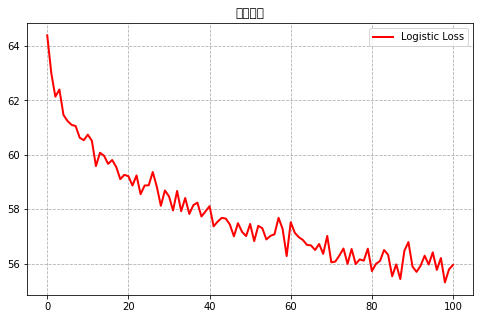

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:608: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:609: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.5417, device='cuda:0')
acc_test_each_k: tensor(0.5417, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.5667, device='cuda:0')
Training Epoch: 0, total loss: 55.350237
total_train_accuracy: tensor(0.5500, device='cuda:0')
Training Epoch: 1, total loss: 56.189107
total_train_accuracy: tensor(0.5292, device='cuda:0')
Training Epoch: 2, total loss: 56.326273
total_train_accuracy: tensor(0.5479, device='cuda:0')
Training Epoch: 3, total loss: 55.516209
total_train_accuracy: tensor(0.5771, device='cuda:0')
Training Epoch: 4, total loss: 55.371933
total_train_accuracy: tensor(0.5521, device='cuda:0')
Training Epoch: 5, total loss: 55.644258
total_train_accuracy: tensor(0.5354, device='cuda:0')
Training Epoch: 6, total loss: 55.858205
total_train_accuracy: tensor(0.5771, device='cuda:0')
Training Epoch: 7, total loss: 55.449647
total_train_accuracy: tensor(0.5292, device='cuda:0')
Training Epoch: 8, total loss: 56.173011
total_train_ac

total_train_accuracy: tensor(0.5563, device='cuda:0')
Training Epoch: 85, total loss: 54.922125
total_train_accuracy: tensor(0.5729, device='cuda:0')
Training Epoch: 86, total loss: 54.374518
total_train_accuracy: tensor(0.5875, device='cuda:0')
Training Epoch: 87, total loss: 54.369648
total_train_accuracy: tensor(0.5583, device='cuda:0')
Training Epoch: 88, total loss: 55.120425
total_train_accuracy: tensor(0.5750, device='cuda:0')
Training Epoch: 89, total loss: 54.656954
total_train_accuracy: tensor(0.5958, device='cuda:0')
Training Epoch: 90, total loss: 54.116350
total_train_accuracy: tensor(0.5958, device='cuda:0')
Training Epoch: 91, total loss: 54.000062
total_train_accuracy: tensor(0.5792, device='cuda:0')
Training Epoch: 92, total loss: 54.605366
total_train_accuracy: tensor(0.5958, device='cuda:0')
Training Epoch: 93, total loss: 54.321997
total_train_accuracy: tensor(0.6104, device='cuda:0')
Training Epoch: 94, total loss: 53.999394
total_train_accuracy: tensor(0.5625, dev

test
test
test
total_test_accuracy: tensor(0.5625, device='cuda:0')
acc_test_each_k: tensor(0.5625, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.5938, device='cuda:0')
Training Epoch: 0, total loss: 54.121958
total_train_accuracy: tensor(0.5729, device='cuda:0')
Training Epoch: 1, total loss: 54.632923
total_train_accuracy: tensor(0.5479, device='cuda:0')
Training Epoch: 2, total loss: 55.185449
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 3, total loss: 53.967491
total_train_accuracy: tensor(0.6021, device='cuda:0')
Training Epoch: 4, total loss: 53.994728
total_train_accuracy: tensor(0.5438, device='cuda:0')
Training Epoch: 5, total loss: 55.074224
total_train_accuracy: tensor(0.5542, device='cuda:0')
Training Epoch: 6, total loss: 54.873856
total_train_accuracy: tensor(0.5917, device='cuda:0')
Training Epoch: 7, total loss: 54.043665
total_train_accuracy: tensor(0.5583, device='cuda:0')
Training Epoch: 8, total loss: 54.954945
total_train_ac

total_train_accuracy: tensor(0.6146, device='cuda:0')
Training Epoch: 86, total loss: 53.598366
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 87, total loss: 53.394104
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 88, total loss: 53.571125
total_train_accuracy: tensor(0.6021, device='cuda:0')
Training Epoch: 89, total loss: 53.546249
total_train_accuracy: tensor(0.6708, device='cuda:0')
Training Epoch: 90, total loss: 51.755647
total_train_accuracy: tensor(0.6313, device='cuda:0')
Training Epoch: 91, total loss: 53.104676
total_train_accuracy: tensor(0.6333, device='cuda:0')
Training Epoch: 92, total loss: 53.064413
total_train_accuracy: tensor(0.6188, device='cuda:0')
Training Epoch: 93, total loss: 53.155248
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 94, total loss: 53.703132
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 95, total loss: 53.748842
total_train_accuracy: tensor(0.6208, dev

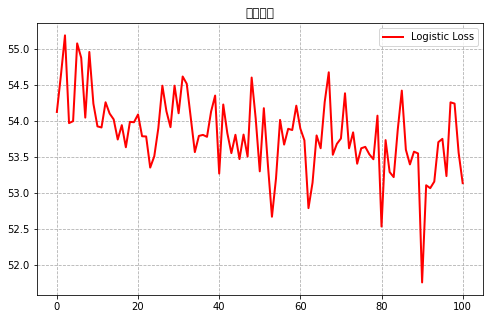

test
test
test
total_test_accuracy: tensor(0.4792, device='cuda:0')
acc_test_each_k: tensor(0.4792, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.6104, device='cuda:0')
Training Epoch: 0, total loss: 53.624635
total_train_accuracy: tensor(0.5833, device='cuda:0')
Training Epoch: 1, total loss: 54.274895
total_train_accuracy: tensor(0.5667, device='cuda:0')
Training Epoch: 2, total loss: 54.542666
total_train_accuracy: tensor(0.5854, device='cuda:0')
Training Epoch: 3, total loss: 53.693063
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 4, total loss: 53.159885
total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 5, total loss: 53.353871
total_train_accuracy: tensor(0.5708, device='cuda:0')
Training Epoch: 6, total loss: 54.225756
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 7, total loss: 53.852425
total_train_accuracy: tensor(0.5958, device='cuda:0')
Training Epoch: 8, total loss: 53.647518
total_train_ac

total_train_accuracy: tensor(0.5750, device='cuda:0')
Training Epoch: 85, total loss: 53.891570
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 86, total loss: 53.158014
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 87, total loss: 52.974707
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 88, total loss: 53.721052
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 89, total loss: 52.488994
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 90, total loss: 53.370426
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 91, total loss: 53.036182
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 92, total loss: 53.599219
total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 93, total loss: 52.689638
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 94, total loss: 53.048938
total_train_accuracy: tensor(0.6188, dev

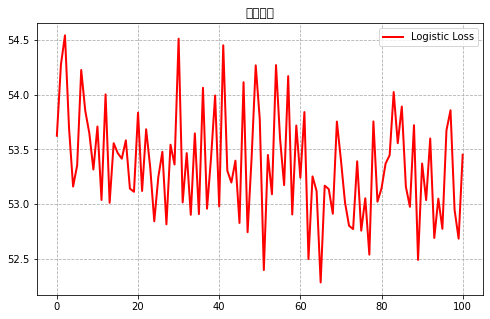

test
test
test
total_test_accuracy: tensor(0.7292, device='cuda:0')
acc_test_each_k: tensor(0.7292, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 0, total loss: 53.430543
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 1, total loss: 52.795781
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 2, total loss: 53.305220
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 3, total loss: 52.863064
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 4, total loss: 53.077437
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 5, total loss: 53.634251
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 6, total loss: 52.849345
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 7, total loss: 53.463776
total_train_accuracy: tensor(0.6313, device='cuda:0')
Training Epoch: 8, total loss: 52.849040
total_train_ac

total_train_accuracy: tensor(0.6500, device='cuda:0')
Training Epoch: 86, total loss: 52.212492
total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 87, total loss: 52.787673
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 88, total loss: 52.393468
total_train_accuracy: tensor(0.6458, device='cuda:0')
Training Epoch: 89, total loss: 52.206464
total_train_accuracy: tensor(0.6167, device='cuda:0')
Training Epoch: 90, total loss: 52.966445
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 91, total loss: 52.338185
total_train_accuracy: tensor(0.6458, device='cuda:0')
Training Epoch: 92, total loss: 52.073469
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 93, total loss: 52.799087
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 94, total loss: 53.221067
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 95, total loss: 52.112818
total_train_accuracy: tensor(0.6292, dev

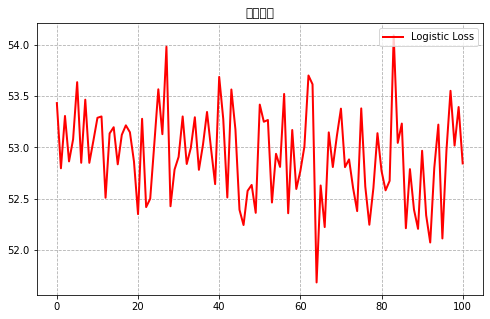

test
test
test
total_test_accuracy: tensor(0.6458, device='cuda:0')
acc_test_each_k: tensor(0.6458, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.5979, device='cuda:0')
Training Epoch: 0, total loss: 53.416675
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 1, total loss: 53.063634
total_train_accuracy: tensor(0.5854, device='cuda:0')
Training Epoch: 2, total loss: 54.460636
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 3, total loss: 53.505441
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 4, total loss: 52.744288
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 5, total loss: 53.068178
total_train_accuracy: tensor(0.5896, device='cuda:0')
Training Epoch: 6, total loss: 53.513530
total_train_accuracy: tensor(0.5792, device='cuda:0')
Training Epoch: 7, total loss: 53.965603
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 8, total loss: 53.077908
total_train_ac

total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 86, total loss: 52.896623
total_train_accuracy: tensor(0.6292, device='cuda:0')
Training Epoch: 87, total loss: 52.697724
total_train_accuracy: tensor(0.5750, device='cuda:0')
Training Epoch: 88, total loss: 53.752937
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 89, total loss: 53.278857
total_train_accuracy: tensor(0.6146, device='cuda:0')
Training Epoch: 90, total loss: 53.049474
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 91, total loss: 52.320709
total_train_accuracy: tensor(0.6375, device='cuda:0')
Training Epoch: 92, total loss: 52.404772
total_train_accuracy: tensor(0.6458, device='cuda:0')
Training Epoch: 93, total loss: 51.956954
total_train_accuracy: tensor(0.5896, device='cuda:0')
Training Epoch: 94, total loss: 53.807760
total_train_accuracy: tensor(0.6104, device='cuda:0')
Training Epoch: 95, total loss: 53.353430
total_train_accuracy: tensor(0.6438, dev

test
test
test
total_test_accuracy: tensor(0.6875, device='cuda:0')
acc_test_each_k: tensor(0.6875, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 0, total loss: 52.981811
total_train_accuracy: tensor(0.5958, device='cuda:0')
Training Epoch: 1, total loss: 53.567169
total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 2, total loss: 52.441828
total_train_accuracy: tensor(0.5979, device='cuda:0')
Training Epoch: 3, total loss: 53.477797
total_train_accuracy: tensor(0.6583, device='cuda:0')
Training Epoch: 4, total loss: 52.018149
total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 5, total loss: 52.147467
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 6, total loss: 52.506110
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 7, total loss: 52.685982
total_train_accuracy: tensor(0.5875, device='cuda:0')
Training Epoch: 8, total loss: 53.598582
total_train_ac

total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 85, total loss: 52.067122
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 86, total loss: 52.689902
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 87, total loss: 52.311543
total_train_accuracy: tensor(0.6375, device='cuda:0')
Training Epoch: 88, total loss: 52.257043
total_train_accuracy: tensor(0.6500, device='cuda:0')
Training Epoch: 89, total loss: 52.128082
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 90, total loss: 52.831941
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 91, total loss: 52.867105
total_train_accuracy: tensor(0.6167, device='cuda:0')
Training Epoch: 92, total loss: 52.799971
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 93, total loss: 53.010858
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 94, total loss: 52.702583
total_train_accuracy: tensor(0.6396, dev

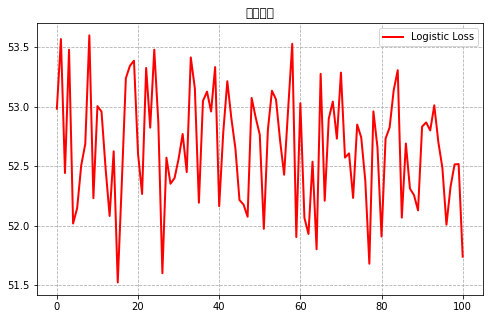

test
test
test
total_test_accuracy: tensor(0.7708, device='cuda:0')
acc_test_each_k: tensor(0.7708, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.6104, device='cuda:0')
Training Epoch: 0, total loss: 53.069371
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 1, total loss: 52.921998
total_train_accuracy: tensor(0.5979, device='cuda:0')
Training Epoch: 2, total loss: 53.411967
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 3, total loss: 52.957614
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 4, total loss: 53.066437
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 5, total loss: 53.159962
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 6, total loss: 52.906973
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 7, total loss: 52.416748
total_train_accuracy: tensor(0.6146, device='cuda:0')
Training Epoch: 8, total loss: 52.906700
total_train_ac

total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 85, total loss: 52.873814
total_train_accuracy: tensor(0.6333, device='cuda:0')
Training Epoch: 86, total loss: 52.859887
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 87, total loss: 52.204174
total_train_accuracy: tensor(0.6479, device='cuda:0')
Training Epoch: 88, total loss: 51.838533
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 89, total loss: 52.338020
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 90, total loss: 52.886005
total_train_accuracy: tensor(0.5854, device='cuda:0')
Training Epoch: 91, total loss: 53.607487
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 92, total loss: 52.885856
total_train_accuracy: tensor(0.6521, device='cuda:0')
Training Epoch: 93, total loss: 51.962901
total_train_accuracy: tensor(0.6563, device='cuda:0')
Training Epoch: 94, total loss: 51.993553
total_train_accuracy: tensor(0.6271, dev

test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.5979, device='cuda:0')
Training Epoch: 0, total loss: 53.301491
total_train_accuracy: tensor(0.6313, device='cuda:0')
Training Epoch: 1, total loss: 52.585944
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 2, total loss: 52.576352
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 3, total loss: 52.269304
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 4, total loss: 52.445824
total_train_accuracy: tensor(0.6375, device='cuda:0')
Training Epoch: 5, total loss: 52.569813
total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 6, total loss: 52.531763
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 7, total loss: 52.783862
total_train_accuracy: tensor(0.6167, device='cuda:0')
Training Epoch: 8, total loss: 52.745005
total_train_ac

total_train_accuracy: tensor(0.6667, device='cuda:0')
Training Epoch: 86, total loss: 51.529525
total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 87, total loss: 52.377856
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 88, total loss: 52.809641
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 89, total loss: 52.580182
total_train_accuracy: tensor(0.6479, device='cuda:0')
Training Epoch: 90, total loss: 52.145189
total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 91, total loss: 52.217179
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 92, total loss: 52.410726
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 93, total loss: 52.850746
total_train_accuracy: tensor(0.6292, device='cuda:0')
Training Epoch: 94, total loss: 52.684645
total_train_accuracy: tensor(0.5938, device='cuda:0')
Training Epoch: 95, total loss: 53.466576
total_train_accuracy: tensor(0.6229, dev

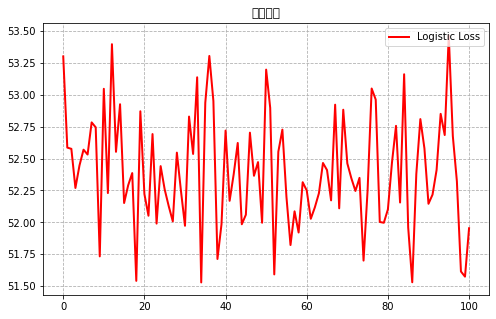

test
test
test
total_test_accuracy: tensor(0.7292, device='cuda:0')
acc_test_each_k: tensor(0.7292, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 0, total loss: 52.787968
total_train_accuracy: tensor(0.6021, device='cuda:0')
Training Epoch: 1, total loss: 53.526280
total_train_accuracy: tensor(0.6188, device='cuda:0')
Training Epoch: 2, total loss: 52.957119
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 3, total loss: 52.300336
total_train_accuracy: tensor(0.6563, device='cuda:0')
Training Epoch: 4, total loss: 51.792578
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 5, total loss: 53.044109
total_train_accuracy: tensor(0.6583, device='cuda:0')
Training Epoch: 6, total loss: 51.634214
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 7, total loss: 52.407257
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 8, total loss: 52.458974
total_train_ac

total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 85, total loss: 52.193936
total_train_accuracy: tensor(0.6375, device='cuda:0')
Training Epoch: 86, total loss: 52.350030
total_train_accuracy: tensor(0.6771, device='cuda:0')
Training Epoch: 87, total loss: 51.263756
total_train_accuracy: tensor(0.6146, device='cuda:0')
Training Epoch: 88, total loss: 52.818393
total_train_accuracy: tensor(0.6667, device='cuda:0')
Training Epoch: 89, total loss: 51.570077
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 90, total loss: 52.198685
total_train_accuracy: tensor(0.6688, device='cuda:0')
Training Epoch: 91, total loss: 51.459067
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 92, total loss: 52.901258
total_train_accuracy: tensor(0.5896, device='cuda:0')
Training Epoch: 93, total loss: 53.651715
total_train_accuracy: tensor(0.6500, device='cuda:0')
Training Epoch: 94, total loss: 51.926160
total_train_accuracy: tensor(0.6313, dev

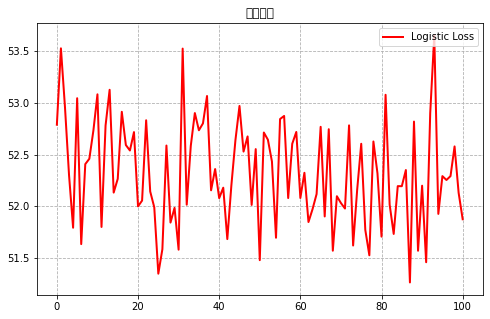

test
test
test
total_test_accuracy: tensor(0.7292, device='cuda:0')
acc_test_each_k: tensor(0.7292, device='cuda:0')
[tensor(0.5417, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.4792, device='cuda:0'), tensor(0.7292, device='cuda:0'), tensor(0.6458, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.7708, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.7292, device='cuda:0'), tensor(0.7292, device='cuda:0')]
[array(0.5416667, dtype=float32), array(0.5625, dtype=float32), array(0.4791667, dtype=float32), array(0.7291667, dtype=float32), array(0.6458334, dtype=float32), array(0.6875, dtype=float32), array(0.7708334, dtype=float32), array(0.8125, dtype=float32), array(0.7291667, dtype=float32), array(0.7291667, dtype=float32)]
acc_test_metrics: 0.66875


In [8]:
#train model with new features of 94
model=model8
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLP4_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLP4_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvMLP4/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP8(
  (bn0): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=9, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 10
f1_score:  %.4f 0.5660207616629784
accuracy_score: 0.5942028985507246
recall_score: 0.571604539251598
pre_recall: 0.5848178872688676
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

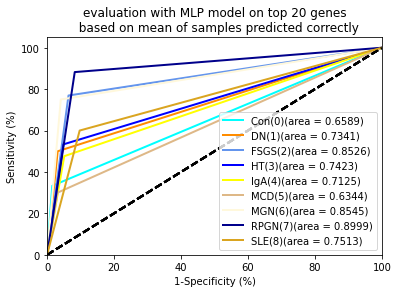

In [9]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLP4/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP8()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLP4_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [14]:
#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvMLP4/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/ConvMLP2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvMLP4_ConvMLP2_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['RHOB', 'MT2A']
intersecion_list: ['NDUFA13']
intersecion_list: ['MEST']
intersecion_list: []
intersecion_list: []
intersecion_list: ['IFI6']
intersecion_list: ['BDKRB2']
intersecion_list: ['GPX2', 'MISP', 'CFB']
intersecion_list: []


In [15]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvMLP4_ConvMLP2_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvMLP4_ConvMLP2_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/ConvMLP4_ConvMLP2_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/ConvMLP4_ConvMLP2_test_info.csv')



9
columns: ['CFB', 'NDUFA13', 'BDKRB2', 'IFI6', 'RHOB', 'MISP', 'MT2A', 'GPX2', 'MEST', 'label']
(549, 10)
(138, 10)


549 87
549 87


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:571: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2854, device='cuda:0')
Training Epoch: 0, total loss: 63.820733
total_train_accuracy: tensor(0.5167, device='cuda:0')
Training Epoch: 1, total loss: 60.654648
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 2, total loss: 58.785515
total_train_accuracy: tensor(0.6500, device='cuda:0')
Training Epoch: 3, total loss: 57.876879
total_train_accuracy: tensor(0.7042, device='cuda:0')
Training Epoch: 4, total loss: 57.078492
total_train_accuracy: tensor(0.7104, device='cuda:0')
Training Epoch: 5, total loss: 56.418830
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 6, total loss: 55.430598
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 7, total loss: 55.076296
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 8, total loss: 54.775761
total_train_accuracy: tensor(0.7625, device='cuda:0')
Training Epoch: 9, total loss: 54.277721
total_train_accuracy: tensor(0.7813, device='cuda:

total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 87, total loss: 45.489443
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 88, total loss: 45.791685
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 89, total loss: 46.196720
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 90, total loss: 46.417919
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 91, total loss: 45.183034
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 92, total loss: 44.873008
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 93, total loss: 45.430728
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 94, total loss: 44.934317
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 95, total loss: 45.770429
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 96, total loss: 45.324440
total_train_accuracy: tensor(0.9479, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

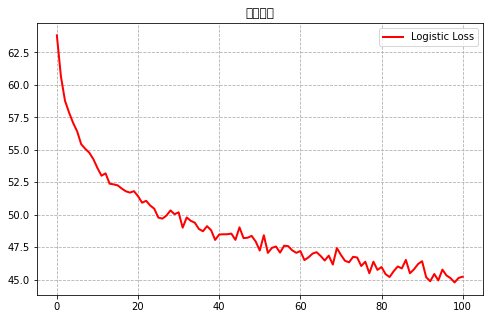

test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 87


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:608: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:609: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 87
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 0, total loss: 45.678097
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 1, total loss: 45.824802
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 2, total loss: 45.444296
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 3, total loss: 45.711716
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 4, total loss: 45.314387
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 5, total loss: 45.458309
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 6, total loss: 44.978189
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 7, total loss: 45.331649
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 8, total loss: 45.216964
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 9, total loss: 45.625592
total_train_accuracy: tensor(0.9042, device

total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 86, total loss: 43.896901
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.560231
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 43.520674
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 43.526345
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 90, total loss: 44.164907
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 43.722381
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 43.517278
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 44.068857
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 94, total loss: 43.829670
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 95, total loss: 44.112094
total_train_accuracy: tensor(0.9583, dev

test
test
test
total_test_accuracy: tensor(0.9167, device='cuda:0')
acc_test_each_k: tensor(0.9167, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 43.954343
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 1, total loss: 44.026226
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 2, total loss: 44.222533
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 3, total loss: 43.963348
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 4, total loss: 44.019059
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 44.088722
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.659830
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.571757
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 8, total loss: 43.964174
total_train_ac

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 43.012976
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.716990
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 87, total loss: 43.675664
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 43.067263
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 43.003269
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.638248
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.955637
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 43.147795
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 93, total loss: 43.257467
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 43.230389
total_train_accuracy: tensor(0.9729, dev

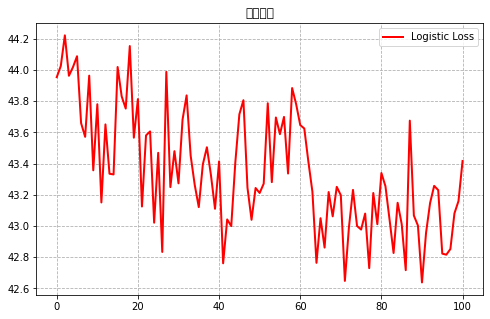

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 0, total loss: 43.853905
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.883402
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.067210
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 3, total loss: 43.338738
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 4, total loss: 43.457403
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 5, total loss: 43.672886
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 6, total loss: 43.855475
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.807379
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 43.288137
total_train_ac

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 86, total loss: 43.210076
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.878379
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 43.001540
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 89, total loss: 43.297190
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 42.878829
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 91, total loss: 43.134293
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.830342
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 93, total loss: 42.829931
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.916204
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 95, total loss: 43.029874
total_train_accuracy: tensor(0.9521, dev

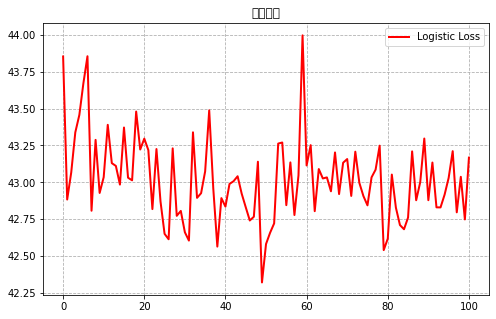

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.809871


KeyboardInterrupt: 

In [13]:
#train model with new features of 94
model=model7
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP4_ConvMLP2_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP4_ConvMLP2_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/ConvMLP4_ConvMLP2/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


In [ ]:
#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/ConvMLP2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP2_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


In [2]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP2_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP2_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLP2_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLP2_test_info.csv')



86
columns: ['LYPLA1', 'SPI1', 'PCK1', 'GDF15', 'CYP2J2', 'NDUFB1', 'GPX3', 'ABCC3', 'RHOB', 'CHP1', 'ACLY', 'DEPTOR', 'MRPS15', 'AGL', 'COMMD10', 'UGDH', 'KLF6', 'METTL9', 'ACP6', 'MRPL19', 'CTSG', 'GPX2', 'BDKRB2', 'LIPC', 'NR0B2', 'VAMP8', 'NONO', 'ACTA2', 'HERC5', 'GEMIN6', 'DUSP6', 'WASHC3', 'ABHD2', 'TESC', 'EPM2AIP1', 'PTP4A1', 'VTCN1', 'PPP6R1', 'AFP', 'WARS2', 'ANKRD2', 'TRIM14', 'IFI44L', 'ADM2', 'CAMLG', 'RRM2', 'RPL38', 'RGN', 'ACTL8', 'MEST', 'TRA2A', 'ZNHIT1', 'EEF1AKMT3', 'COL4A3BP', 'ATP6V1F', 'BCCIP', 'RGS5', 'ABCB7', 'ENPP2', 'NDUFA13', 'CGREF1', 'ACAD10', 'VDR', 'SLC3A2', 'SH3BP2', 'CFB', 'RHOBTB1', 'TMEM100', 'ADI1', 'EGLN3', 'CTTN', 'CFLAR', 'RPS27L', 'ABCD3', 'PTMS', 'LHPP', 'COX15', 'ISCU', 'FST', 'ITGB3BP', 'MRPS16', 'IFI6', 'UCHL1', 'IFIT1', 'ATP5IF1', 'NUDT4', 'label']
(549, 87)
(138, 87)


549 87
549 87


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:550: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:551: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2708, device='cuda:0')
Training Epoch: 0, total loss: 63.968767
total_train_accuracy: tensor(0.5208, device='cuda:0')
Training Epoch: 1, total loss: 60.442196
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 2, total loss: 59.396495
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 3, total loss: 58.104572
total_train_accuracy: tensor(0.6875, device='cuda:0')
Training Epoch: 4, total loss: 57.197053
total_train_accuracy: tensor(0.7167, device='cuda:0')
Training Epoch: 5, total loss: 56.411910
total_train_accuracy: tensor(0.7375, device='cuda:0')
Training Epoch: 6, total loss: 55.447482
total_train_accuracy: tensor(0.7250, device='cuda:0')
Training Epoch: 7, total loss: 55.604316
total_train_accuracy: tensor(0.7583, device='cuda:0')
Training Epoch: 8, total loss: 54.727369
total_train_accuracy: tensor(0.7958, device='cuda:0')
Training Epoch: 9, total loss: 54.064585
total_train_accuracy: tensor(0.7875, device='cuda:

total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 87, total loss: 45.500739
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 45.056843
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 89, total loss: 45.599275
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 90, total loss: 45.212012
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 91, total loss: 45.645249
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 92, total loss: 45.514960
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 93, total loss: 45.481279
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 94, total loss: 45.902900
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 95, total loss: 45.122974
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 96, total loss: 46.560856
total_train_accuracy: tensor(0.9271, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 100, total loss: 45.396683
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


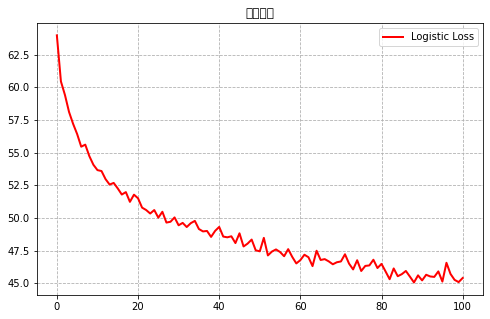

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:588: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:589: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8542, device='cuda:0')
acc_test_each_k: tensor(0.8542, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 0, total loss: 45.742929
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 1, total loss: 46.288337
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 2, total loss: 45.088354
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 3, total loss: 45.192545
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 4, total loss: 45.326448
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 5, total loss: 45.112977
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 6, total loss: 45.425113
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 7, total loss: 45.397063
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 8, total loss: 45.308966
total_train_ac

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 43.548717
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 86, total loss: 43.570976
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 43.241467
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 88, total loss: 43.785940
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 44.075093
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 43.212087
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 91, total loss: 43.541631
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 92, total loss: 43.509945
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 43.443349
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 43.495623
total_train_accuracy: tensor(0.9583, dev

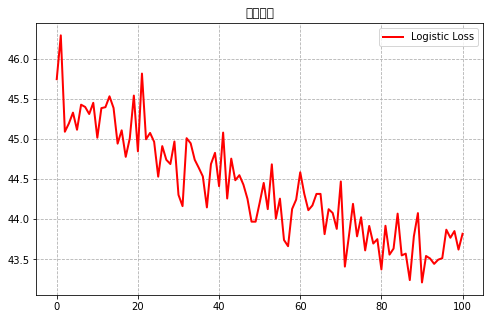

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 0, total loss: 44.223258
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 1, total loss: 44.220280
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 2, total loss: 44.352578
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 3, total loss: 44.340475
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 43.714777
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 43.609536
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 6, total loss: 44.445553
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 43.627688
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 8, total loss: 43.637972
total_train_ac

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.997337
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 86, total loss: 43.914109
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.955918
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 43.026520
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 43.051063
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.908718
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.691284
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 92, total loss: 43.551838
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.908172
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 43.289728
total_train_accuracy: tensor(0.9792, dev

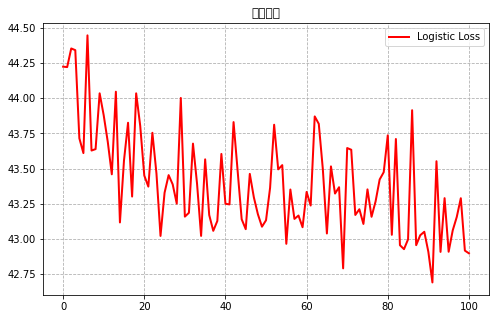

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 43.182762
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 1, total loss: 43.833170
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 2, total loss: 43.276693
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 43.249135
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.939636
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.739938
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.335850
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.321395
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 8, total loss: 43.577993
total_train_accuracy: 

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.554064
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.479284
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 87, total loss: 43.150597
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.879083
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 43.215012
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.807576
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.836135
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.690299
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 93, total loss: 43.587168
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.974115
total_train_accuracy: tensor(0.9771, dev

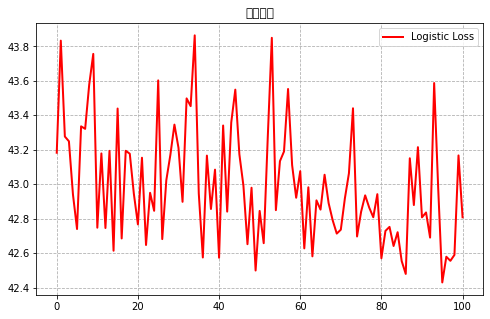

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 43.398310
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 42.987536
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.277479
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 3, total loss: 43.611858
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.060657
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.618878
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.826862
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.148847
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.830664
total_train_ac

total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 85, total loss: 43.169504
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.535491
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.666451
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.776903
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.782464
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.399838
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 43.126807
total_train_accuracy: tensor(0.9938, device='cuda:0')
Training Epoch: 92, total loss: 42.106189
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.480332
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.223024
total_train_accuracy: tensor(0.9750, dev

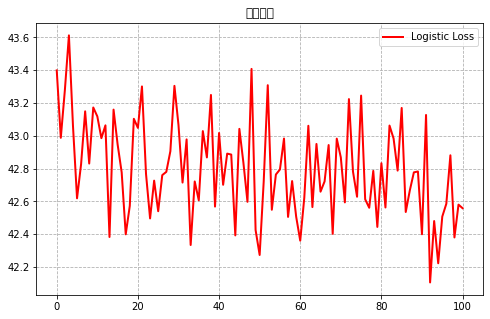

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 43.352986
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.730661
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.022961
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.878080
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 42.899897
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.464256
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.880562
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 42.899920
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.404684
total_train_ac

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.711859
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.602878
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.811024
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 88, total loss: 42.957508
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.515783
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.960022
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.663006
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.818403
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 93, total loss: 42.954222
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 94, total loss: 42.336646
total_train_accuracy: tensor(0.9604, dev

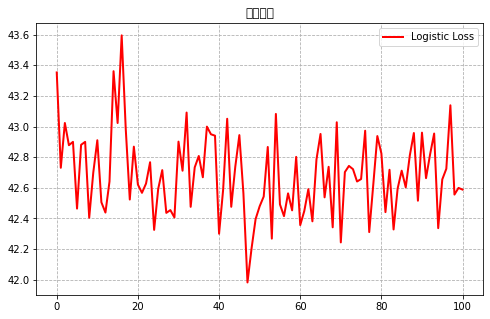

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.724832
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.828567
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 2, total loss: 43.109126
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.567159
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.848087
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.675659
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.570169
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.766929
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.837257
total_train_accuracy: 

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.448015
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.431830
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.478868
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.406165
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.487956
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.134379
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.165095
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.631002
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 42.870212
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.639099
total_train_accuracy: tensor(0.9688, dev

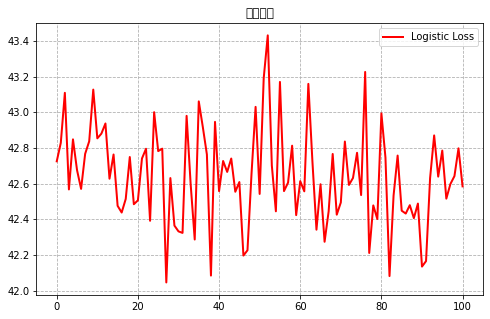

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.661035
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.707805
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.729032
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 3, total loss: 42.318726
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 42.958254
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.475429
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.754459
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.665817
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.449027
total_train_accuracy: 

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.246608
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.117012
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.620815
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.367328
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.690988
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.799464
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.716270
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.564885
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.579423
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 42.714348
total_train_accuracy: tensor(0.9646, dev

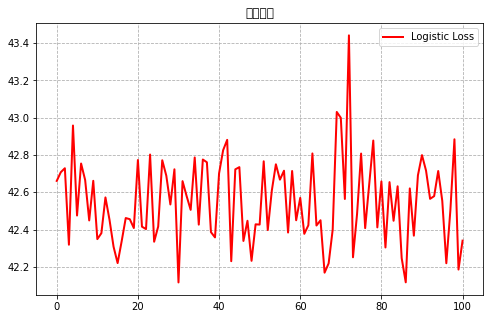

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 42.852083
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.472640
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 42.962312
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.700471
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 4, total loss: 43.321981
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.363080
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.440832
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.407594
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.359512
total_train_accuracy: 

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.198129
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.278478
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.270174
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.665790
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.583185
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.295277
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 43.048035
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.160544
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.319280
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.528167
total_train_accuracy: tensor(0.9708, dev

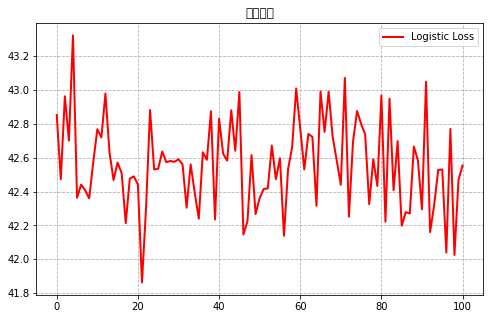

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.053507
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.541743
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 42.738322
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.496153
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.009675
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.225273
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 6, total loss: 42.904547
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.395918
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.855053
total_train_accuracy: 

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.422922
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.084641
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.761583
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 88, total loss: 42.008411
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.509762
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.287543
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 42.700490
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.421305
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 42.796096
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.398187
total_train_accuracy: tensor(0.9646, dev

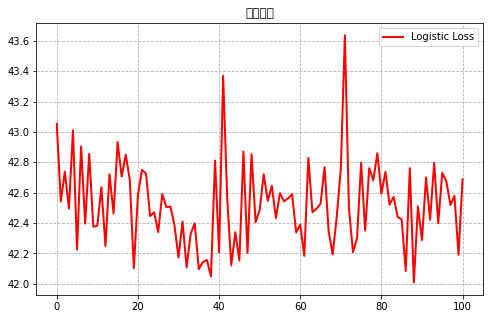

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8542, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8541667, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.975


In [7]:
#train model with new features of 94
model=model7
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLP2_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLP2_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvMLP2/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


In [2]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLP2/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP7()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLP2_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



MLP7(
  (bn0): BatchNorm1d(86, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=86, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 87
f1_score:  %.4f 0.8818464836008695
accuracy_score: 0.8913043478260869
recall_score: 0.8804196892432187
pre_recall: 0.8972718639385308
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

In [2]:
#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvMLP2/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['CYP39A1', 'RHOB', 'PTP4A1', 'KLF6', 'GPX3', 'DUSP6', 'ABCB7', 'EEF1AKMT3', 'PCK1', 'GDF15', 'IFI6', 'NUDT4', 'LYPLA1']
intersecion_list: ['CHP1', 'LGMN', 'RPS27L', 'SLC3A2', 'CHODL', 'LHPP', 'RGS5', 'CYP2J2', 'AGL', 'CTSG', 'IFI6', 'ZNHIT1', 'NDUFA13']
intersecion_list: ['MEST', 'CAMLG', 'COX15', 'TUBA4B', 'TFAP2A', 'VDR', 'CFLAR', 'EPM2AIP1', 'TRA2A', 'ACTA2', 'ACP6', 'NEAT1', 'NR1D2', 'METTL9', 'VTCN1', 'NDUFA13', 'ISCU']
intersecion_list: ['ATP6V1F', 'FST', 'SLC3A2', 'KLF6', 'BHLHE40', 'PCK1', 'TYMP', 'TESC', 'VAMP8', 'IFI6', 'UQCR10']
intersecion_list: ['FKBP4', 'NONO', 'ECH1', 'ACE', 'TMEM100', 'ITGB3BP', 'PEG10', 'WDR12', 'CPVL', 'WASHC3', 'AFP', 'EMX1', 'RPL38', 'LYPLA1']
intersecion_list: ['IFIT1', 'RRM2', 'LGMN', 'MRPS16', 'ATP5IF1', 'EPM2AIP1', 'ITGB3BP', 'DEPTOR', 'COL4A3BP', 'OLFML3', 'PTMS', 'LIPC', 'IFI6', 'CHCHD3']
intersecion_list: ['BDKRB2', 'WASHC4', 'WARS2', 'NDUFB1', 'UCHL1', 'NPIPB15', 'SPI1', 'OXCT1', 'RGN', 'ABLIM1', 'NUDT4', 'ACAD10', 'ABHD2'

In [3]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/ConvMLP2_NFM_test_info.csv')



101
columns: ['LHPP', 'PEG10', 'DEPTOR', 'NDUFB1', 'CTSG', 'SH3BP2', 'CHODL', 'RPL38', 'BCCIP', 'RRM2', 'MAP3K1', 'RPS27L', 'TUBA4B', 'BDKRB2', 'PTP4A1', 'TMEM100', 'ATP5IF1', 'PCK1', 'CPVL', 'PTMS', 'IFI6', 'NUDT4', 'GPX2', 'NDUFA13', 'FKBP4', 'ECH1', 'CFLAR', 'IFI44L', 'VDR', 'ATP6V1F', 'RHOBTB1', 'SLC3A2', 'KLF6', 'ABLIM1', 'VAMP8', 'CGREF1', 'ACAD10', 'ADI1', 'COX15', 'MRPS16', 'ABCC3', 'TRA2A', 'ACP6', 'NEAT1', 'CYP2J2', 'AGL', 'ALB', 'LGMN', 'ACE', 'ACTA2', 'OLFML3', 'UCHL1', 'WASHC3', 'TESC', 'AFP', 'GDF15', 'METTL9', 'RGS5', 'UQCR10', 'ABHD2', 'PPP6R1', 'IFIT1', 'CHP1', 'EPM2AIP1', 'ITGB3BP', 'ABCB7', 'DUSP6', 'WDR12', 'CFB', 'SPI1', 'TYMP', 'OXCT1', 'LIPC', 'NR1D2', 'EMX1', 'ZNHIT1', 'VTCN1', 'UGDH', 'CHCHD3', 'CAMLG', 'CYP39A1', 'TFAP2A', 'RHOB', 'WASHC4', 'BHLHE40', 'NPIPB15', 'KLF9', 'ANKRD2', 'LYPLA1', 'NONO', 'MEST', 'FST', 'TRIM14', 'WARS2', 'GPX3', 'COL4A3BP', 'MS4A4A', 'EEF1AKMT3', 'RGN', 'HERC5', 'ISCU', 'label']
(549, 102)
(138, 102)


In [ ]:
#train model with new features of 94
model=model9
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/ConvMLP2_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


In [6]:
#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['CYP39A1', 'GPX3', 'EEF1AKMT3', 'GDF15', 'IFI6', 'KLF6', 'PTP4A1', 'RHOB', 'LYPLA1', 'NUDT4', 'ABCB7', 'IFI44L', 'ALB', 'PCK1']
intersecion_list: ['LGMN', 'RGS5', 'ZNHIT1', 'TESC', 'CHODL', 'AGL', 'CTSG', 'LHPP', 'CHP1', 'RPS27L', 'CYP2J2']
intersecion_list: ['GPX3', 'ACTA2', 'ACP6', 'CAMLG', 'NEAT1', 'TRA2A', 'NDUFA13', 'MEST', 'METTL9', 'FOS', 'CFLAR', 'VTCN1', 'VDR', 'TUBA4B', 'COX15']
intersecion_list: ['SLC3A2', 'TESC', 'VAMP8', 'FST', 'KLF6', 'IFI6', 'UQCR10', 'TYMP', 'TTC1', 'ATP6V1F', 'CYP21A2']
intersecion_list: ['LARP1', 'NONO', 'WDR12', 'EMX1', 'WASHC3', 'RPL38', 'TMEM100', 'CPVL', 'LYPLA1', 'ECH1', 'FCGBP', 'ITGB3BP']
intersecion_list: ['MRPS16', 'RHBDL1', 'LGMN', 'DEPTOR', 'CHCHD3', 'ATP5IF1', 'OLFML3', 'IFI6', 'IFIT1', 'RRM2', 'LIPC', 'ITGB3BP']
intersecion_list: ['ABHD2', 'UCHL1', 'WARS2', 'NDUFB1', 'ACAD10', 'CAMLG', 'SPI1', 'ABLIM1', 'WASHC4', 'NUDT4', 'SERPINF1', 'ADI1', 'PLIN3']
intersecion_list: ['MT2A', 'GPX3', 'UGDH', 'IGLV2-14', 'KLF9', 'IFI6',

In [7]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/test_info.csv')



90
columns: ['CYP39A1', 'KLF9', 'EMX1', 'CAMLG', 'KLF6', 'FST', 'RPS27L', 'ABCB7', 'VDR', 'ECH1', 'TUBA4B', 'ABHD2', 'GPX3', 'TESC', 'CHCHD3', 'WDR12', 'VAMP8', 'TRA2A', 'WASHC3', 'LYPLA1', 'RRM2', 'NUDT4', 'ITGB3BP', 'COX15', 'PCK1', 'MT2A', 'LARP1', 'ZNHIT1', 'SLC3A2', 'NDUFB1', 'ACAD10', 'RPL38', 'PTP4A1', 'SERPINF1', 'MS4A4A', 'TYMP', 'LGMN', 'ADI1', 'MEST', 'CHP1', 'UQCR10', 'BCCIP', 'VTCN1', 'FCGBP', 'ALB', 'DEPTOR', 'IGLV2-14', 'ATP5IF1', 'SPI1', 'OLFML3', 'METTL9', 'FOS', 'LIPC', 'CYP21A2', 'CFB', 'RGS5', 'ACP6', 'TRIM14', 'EEF1AKMT3', 'WARS2', 'LHPP', 'NEAT1', 'ABLIM1', 'CPVL', 'RHOB', 'WASHC4', 'MAP3K1', 'GPX2', 'PLIN3', 'UGDH', 'NONO', 'AGL', 'CTSG', 'GDF15', 'NDUFA13', 'IFI6', 'IFIT1', 'TMEM100', 'ATP6V1F', 'ABCC3', 'CYP2J2', 'TFAM', 'MRPS16', 'RHBDL1', 'ACTA2', 'UCHL1', 'CHODL', 'CFLAR', 'TTC1', 'IFI44L', 'label']
(549, 91)
(138, 91)


549 91
549 91


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:531: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2792, device='cuda:0')
Training Epoch: 0, total loss: 63.957297
total_train_accuracy: tensor(0.4729, device='cuda:0')
Training Epoch: 1, total loss: 61.032840
total_train_accuracy: tensor(0.5750, device='cuda:0')
Training Epoch: 2, total loss: 59.057480
total_train_accuracy: tensor(0.6333, device='cuda:0')
Training Epoch: 3, total loss: 58.046483
total_train_accuracy: tensor(0.6854, device='cuda:0')
Training Epoch: 4, total loss: 57.006543
total_train_accuracy: tensor(0.6875, device='cuda:0')
Training Epoch: 5, total loss: 56.686778
total_train_accuracy: tensor(0.7271, device='cuda:0')
Training Epoch: 6, total loss: 55.708101
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 7, total loss: 55.349774
total_train_accuracy: tensor(0.7771, device='cuda:0')
Training Epoch: 8, total loss: 54.375835
total_train_accuracy: tensor(0.7438, device='cuda:0')
Training Epoch: 9, total loss: 54.868220
total_train_accuracy: tensor(0.7521, device='cuda:

total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 87, total loss: 45.507736
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 88, total loss: 45.340736
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 89, total loss: 45.876947
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 90, total loss: 45.877605
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 91, total loss: 45.729488
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 92, total loss: 45.439887
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 93, total loss: 45.609368
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 94, total loss: 45.116361
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 95, total loss: 44.696681
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 96, total loss: 45.842204
total_train_accuracy: tensor(0.9396, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

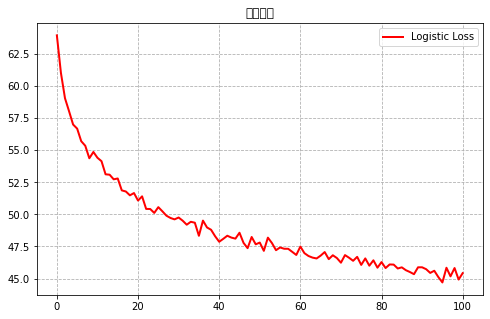

test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 91


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 91
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 0, total loss: 46.400553
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 1, total loss: 46.172726
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 2, total loss: 45.856374
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 3, total loss: 45.511001
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 4, total loss: 45.394246
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 5, total loss: 45.138744
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 6, total loss: 45.947655
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 7, total loss: 45.942431
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 8, total loss: 45.184061
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 9, total loss: 45.076967
total_train_accuracy: tensor(0.9313, device

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 43.556002
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 43.431630
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 89, total loss: 44.010070
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 90, total loss: 43.909255
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 43.387505
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 43.378664
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 43.644652
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 43.845263
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 95, total loss: 43.305211
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 96, total loss: 43.459345
total_train_accuracy: tensor(0.9563, dev

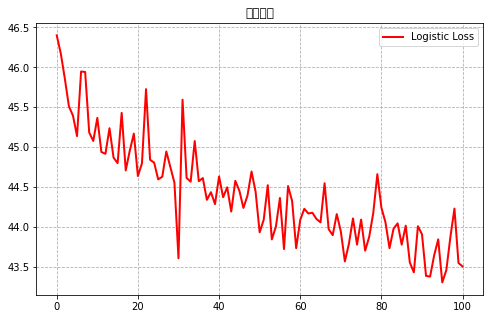

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.778424
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 44.111460
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 2, total loss: 43.920132
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 3, total loss: 43.803864
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.399432
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 43.975739
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.535563
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 43.341310
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 43.440777
total_train_ac

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.830665
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 86, total loss: 43.357813
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 87, total loss: 43.139515
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.972798
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 43.191023
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 43.121346
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.642131
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.841633
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 43.033296
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 43.389593
total_train_accuracy: tensor(0.9729, dev

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 43.298910
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 1, total loss: 43.291070
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 43.001014
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 3, total loss: 43.352421
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 43.432238
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 43.396622
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 6, total loss: 43.469409
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.693439
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.724202
total_train_ac

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.728597
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 86, total loss: 42.445622
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.848918
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.588189
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 43.143115
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 42.747994
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.469017
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 43.082096
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 43.084238
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 43.143555
total_train_accuracy: tensor(0.9646, dev

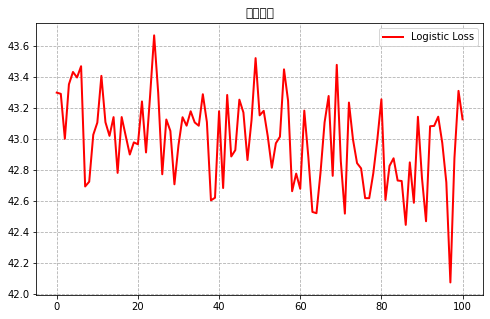

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.507744
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 43.155999
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.246942
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.754101
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.877213
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.959384
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.751360
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.596224
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.841339
total_train_ac

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.440084
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 87, total loss: 42.855989
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 88, total loss: 43.146880
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.620223
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.288738
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.954612
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 92, total loss: 43.199567
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 42.943130
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.794576
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 95, total loss: 42.535567
total_train_accuracy: tensor(0.9750, dev

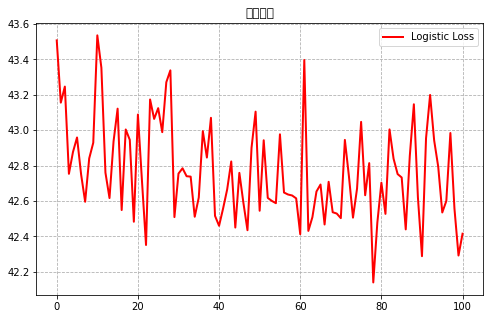

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.196859
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 1, total loss: 42.410898
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 2, total loss: 43.740481
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 3, total loss: 43.209471
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.090875
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.969463
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.050460
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.937055
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 42.908238
total_train_ac

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.486301
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.289608
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.424846
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 42.815059
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.517727
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.550073
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.834710
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 42.922583
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.807518
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 95, total loss: 42.459881
total_train_accuracy: tensor(0.9729, dev

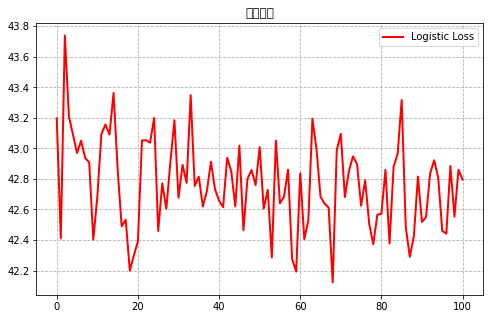

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.813773
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 1, total loss: 42.891788
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 2, total loss: 42.520784
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.547786
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.541240
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.754524
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 42.853023
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.671716
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 42.637660
total_train_accuracy: 

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 85, total loss: 42.724212
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.323238
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 87, total loss: 43.001606
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 42.918383
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.436758
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.289083
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.599141
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.643353
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 42.890766
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.578844
total_train_accuracy: tensor(0.9875, dev

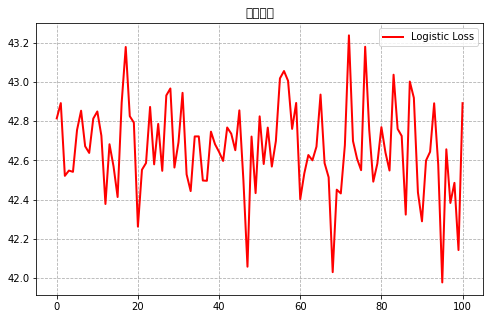

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.767312
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.538562
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 43.102861
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.632738
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.659730
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.492477
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.775537
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.668476
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.412264
total_train_accuracy: 

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.426674
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 87, total loss: 42.869740
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.332510
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.370390
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.387918
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.399189
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.437538
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 93, total loss: 42.310043
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.601699
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 95, total loss: 42.015238
total_train_accuracy: tensor(0.9688, dev

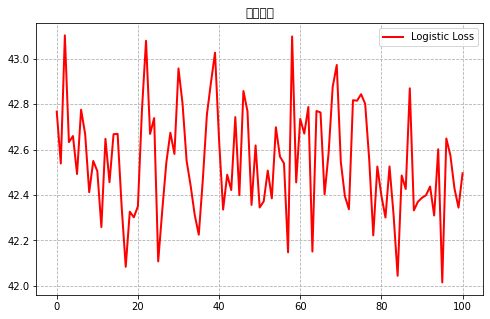

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 42.828166
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.526219
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.737257
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 3, total loss: 43.126001
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.713581
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.727293
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.269447
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.494812
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.553571
total_train_accuracy: 

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.660264
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.303733
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.259809
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.383034
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.476114
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.307360
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.563098
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 93, total loss: 42.116894
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.510093
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 95, total loss: 42.154906
total_train_accuracy: tensor(0.9833, dev

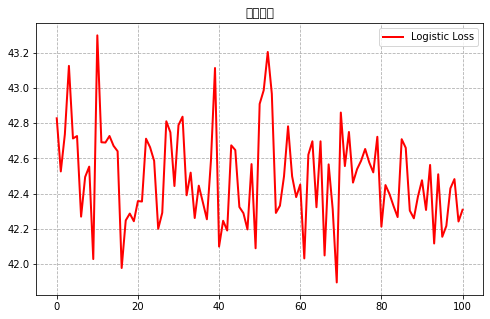

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.681093
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.436069
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 2, total loss: 42.135357
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.497822
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.461327
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.380665
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.534994
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.561729
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.244483
total_train_accuracy: 

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.495974
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.336463
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 87, total loss: 41.714500
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.607329
total_train_accuracy: tensor(0.9958, device='cuda:0')
Training Epoch: 89, total loss: 41.744547
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.293028
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 42.738567
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.177314
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.645854
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.294778
total_train_accuracy: tensor(0.9667, dev

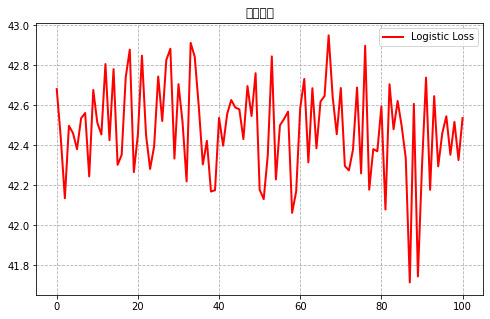

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8125, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8125, dtype=float32), array(0.9583334, dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.96875


In [9]:
#train model with new features of 94
model=model2
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP2(
  (bn0): BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=90, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 91
f1_score:  %.4f 0.8998572860277692
accuracy_score: 0.9057971014492754
recall_score: 0.8970863559098853
pre_recall: 0.9176696196820036
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

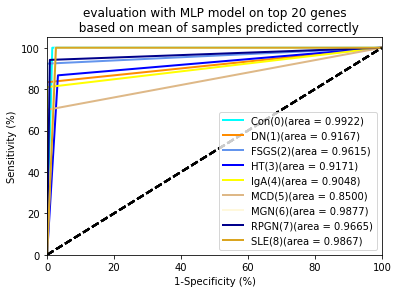

In [12]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP2()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [16]:
#NFM and ConvMLP1 interaction top 20
#
#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvMLP2/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['LYPLA1', 'DUSP6', 'EEF1AKMT3', 'PTP4A1', 'GPX3', 'KLF6', 'NUDT4', 'CYP39A1', 'GDF15', 'IFI6', 'RHOB', 'ABCB7', 'PCK1']
intersecion_list: ['AGL', 'CTSG', 'LGMN', 'SLC3A2', 'RPS27L', 'CHP1', 'CYP2J2', 'CHODL', 'ZNHIT1', 'NDUFA13', 'LHPP', 'IFI6', 'RGS5']
intersecion_list: ['CAMLG', 'ACTA2', 'NEAT1', 'NR1D2', 'TFAP2A', 'METTL9', 'ISCU', 'VTCN1', 'COX15', 'ACP6', 'NDUFA13', 'CFLAR', 'VDR', 'EPM2AIP1', 'TRA2A', 'TUBA4B', 'MEST']
intersecion_list: ['VAMP8', 'FST', 'TYMP', 'ATP6V1F', 'SLC3A2', 'TESC', 'KLF6', 'BHLHE40', 'UQCR10', 'IFI6', 'PCK1']
intersecion_list: ['LYPLA1', 'ACE', 'EMX1', 'NONO', 'ECH1', 'PEG10', 'FKBP4', 'WASHC3', 'ITGB3BP', 'TMEM100', 'WDR12', 'RPL38', 'CPVL', 'AFP']
intersecion_list: ['IFIT1', 'DEPTOR', 'OLFML3', 'LGMN', 'RRM2', 'ATP5IF1', 'COL4A3BP', 'MRPS16', 'EPM2AIP1', 'IFI6', 'LIPC', 'CHCHD3', 'ITGB3BP', 'PTMS']
intersecion_list: ['NPIPB15', 'NDUFB1', 'WARS2', 'ADI1', 'UCHL1', 'NUDT4', 'ABHD2', 'ACAD10', 'ABLIM1', 'RGN', 'WASHC4', 'OXCT1', 'BDKRB2'

In [8]:
#NFM and ConvMLP1 interaction top 20
#
#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvMLPy/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvMLPy_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['PTP4A1', 'CYP39A1', 'EEF1AKMT3', 'GPX3', 'KLF6', 'ADPRM', 'RHOB', 'LYPLA1', 'GDF15', 'NUDT4', 'IFI6', 'ALB', 'PCK1', 'IFI44L']
intersecion_list: ['CTSG', 'UCHL1', 'LHPP', 'CHP1', 'ZNHIT1', 'MS4A4A', 'NDUFA13', 'RGS5', 'AGL', 'LGMN', 'CYP2J2', 'IFI6', 'RPS27L', 'CHODL']
intersecion_list: ['NEAT1', 'COX15', 'FOS', 'ACP6', 'VTCN1', 'TFAP2A', 'MEST', 'ISCU', 'METTL9', 'VDR', 'TUBA4B', 'CFLAR', 'EPM2AIP1', 'TRA2A', 'ACTA2']
intersecion_list: ['VAMP8', 'UQCR10', 'CYP21A2', 'ELF3', 'BHLHE40', 'KLF6', 'SLC3A2', 'TESC', 'FST', 'IFI6', 'ATP6V1F', 'PCK1']
intersecion_list: ['BTG1', 'EMX1', 'CPVL', 'TMEM100', 'LARP1', 'WASHC3', 'ITGB3BP', 'FCGBP', 'LYPLA1', 'WDR12', 'NUDT4', 'FKBP4']
intersecion_list: ['CHCHD3', 'LIPC', 'OLFML3', 'IFI6', 'DEPTOR', 'ATP5IF1', 'IFIT1', 'MRPS16', 'LGMN', 'COL4A3BP', 'PTMS', 'EPM2AIP1', 'RRM2']
intersecion_list: ['ABLIM1', 'UCHL1', 'BDKRB2', 'NDUFB1', 'PLIN3', 'ADI1', 'OXCT1', 'WARS2', 'ACAD10', 'SPI1', 'NUDT4', 'ABHD2', 'RGN', 'WASHC4', 'CAMLG', '

In [17]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/ConvMLP2_NFM_test_info.csv')



101
columns: ['EEF1AKMT3', 'GPX3', 'MS4A4A', 'SLC3A2', 'METTL9', 'NONO', 'SH3BP2', 'TRIM14', 'ACAD10', 'NDUFA13', 'HERC5', 'OXCT1', 'EMX1', 'FST', 'ACTA2', 'ATP6V1F', 'DEPTOR', 'OLFML3', 'CGREF1', 'TESC', 'WARS2', 'ADI1', 'PPP6R1', 'NUDT4', 'ANKRD2', 'CYP39A1', 'WASHC4', 'CHCHD3', 'PCK1', 'LYPLA1', 'CAMLG', 'NDUFB1', 'LGMN', 'TFAP2A', 'ACP6', 'UCHL1', 'COX15', 'IFI44L', 'CFLAR', 'EPM2AIP1', 'TMEM100', 'ATP5IF1', 'RRM2', 'BHLHE40', 'ISCU', 'RGS5', 'BDKRB2', 'WDR12', 'TUBA4B', 'CPVL', 'AFP', 'MEST', 'SPI1', 'CTSG', 'DUSP6', 'NEAT1', 'KLF9', 'CHP1', 'RGN', 'VDR', 'TRA2A', 'ABCB7', 'GPX2', 'MAP3K1', 'IFIT1', 'NPIPB15', 'PTP4A1', 'KLF6', 'RPS27L', 'CYP2J2', 'ZNHIT1', 'GDF15', 'ALB', 'ABCC3', 'BCCIP', 'ITGB3BP', 'AGL', 'TYMP', 'NR1D2', 'RHOB', 'VTCN1', 'ABHD2', 'UQCR10', 'UGDH', 'IFI6', 'LIPC', 'PTMS', 'RHOBTB1', 'ACE', 'ECH1', 'PEG10', 'CHODL', 'FKBP4', 'COL4A3BP', 'MRPS16', 'ABLIM1', 'CFB', 'LHPP', 'RPL38', 'WASHC3', 'VAMP8', 'label']
(549, 102)
(138, 102)


549 102
549 102


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:590: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:591: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2479, device='cuda:0')
Training Epoch: 0, total loss: 64.237063
total_train_accuracy: tensor(0.4917, device='cuda:0')
Training Epoch: 1, total loss: 60.755794
total_train_accuracy: tensor(0.6146, device='cuda:0')
Training Epoch: 2, total loss: 58.790426
total_train_accuracy: tensor(0.6646, device='cuda:0')
Training Epoch: 3, total loss: 57.953270
total_train_accuracy: tensor(0.6646, device='cuda:0')
Training Epoch: 4, total loss: 57.509859
total_train_accuracy: tensor(0.7292, device='cuda:0')
Training Epoch: 5, total loss: 56.272771
total_train_accuracy: tensor(0.7292, device='cuda:0')
Training Epoch: 6, total loss: 55.886846
total_train_accuracy: tensor(0.7313, device='cuda:0')
Training Epoch: 7, total loss: 55.246234
total_train_accuracy: tensor(0.7396, device='cuda:0')
Training Epoch: 8, total loss: 54.906894
total_train_accuracy: tensor(0.8000, device='cuda:0')
Training Epoch: 9, total loss: 54.192002
total_train_accuracy: tensor(0.7875, device='cuda:

total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 87, total loss: 45.662088
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 88, total loss: 45.987131
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 89, total loss: 45.458483
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 90, total loss: 45.566337
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 91, total loss: 45.746057
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 92, total loss: 45.523147
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 93, total loss: 45.572511
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 94, total loss: 45.726110
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 95, total loss: 45.336046
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 96, total loss: 45.114248
total_train_accuracy: tensor(0.9292, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 100, total loss: 45.067388
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


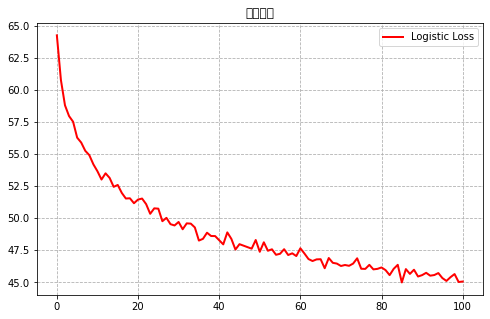

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:628: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:629: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 0, total loss: 45.501528
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 1, total loss: 45.251237
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 2, total loss: 46.420239
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 3, total loss: 46.218353
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 4, total loss: 45.005593
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 5, total loss: 45.234741
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 6, total loss: 45.380917
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 7, total loss: 45.461859
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 8, total loss: 45.252991
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 43.426409
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 43.543440
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 43.644504
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 43.501661
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 43.920412
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 43.471824
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 43.510735
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 43.306453
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 43.328660
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 43.346292
total_train_accuracy: tensor(0.9625, dev

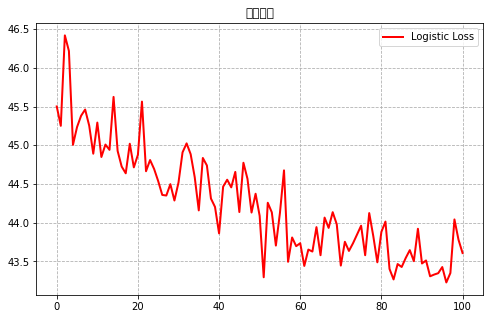

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.913598
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 43.792278
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.912408
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 3, total loss: 43.647300
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 43.228091
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 44.097355
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.283434
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 7, total loss: 43.976566
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 43.310431
total_train_

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 43.228643
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.988756
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.797814
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.562497
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.792715
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.761620
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 43.111734
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 43.160641
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.998274
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 95, total loss: 43.237925
total_train_accuracy: tensor(0.9604, dev

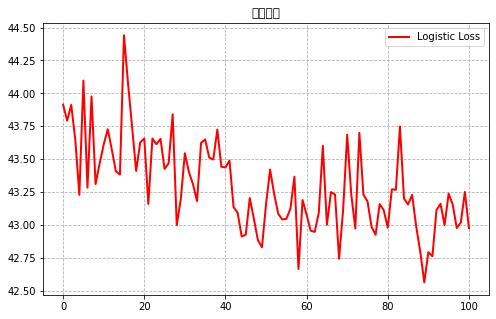

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.296586
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.848651
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.046767
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.596881
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.128716
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.913579
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.640327
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 43.258889
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.915094
total_train_

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.258090
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.935732
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.826719
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.910849
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 43.452788
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.866684
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.883356
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 92, total loss: 43.156147
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.869177
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.663970
total_train_accuracy: tensor(0.9792, dev

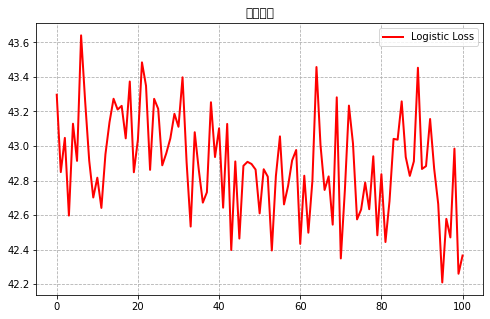

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 43.032678
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.656827
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 2, total loss: 42.660925
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.723228
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.780615
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.574606
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.805338
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 43.138380
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 8, total loss: 42.419771
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 86, total loss: 42.416865
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.433261
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.561085
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.481264
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.509755
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.377148
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.509656
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.671232
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.532088
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 95, total loss: 42.850370
total_train_accuracy: tensor(0.9729, dev

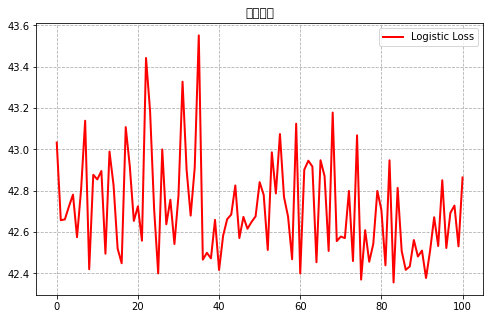

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.222174
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.488145
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.363067
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.323056
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.075768
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.732128
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 42.935254
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 7, total loss: 42.275115
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 8, total loss: 42.418975
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.680076
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.316035
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.545806
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.722990
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.821173
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.471262
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.359275
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.619052
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.795176
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.529160


In [ ]:
#train model with new features of 94
model=model9
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/ConvMLP4_NFM_20/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


In [ ]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/ConvMLP2_NFM_20/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP9()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/ConvMLP2_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [9]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvMLPy_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvMLPy_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/ConvMLPy_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/ConvMLPy_NFM_test_info.csv')



99
columns: ['VAMP8', 'LIPC', 'ELF3', 'MS4A4A', 'SH3BP2', 'TFAP2A', 'ATP5IF1', 'TESC', 'LYPLA1', 'GDF15', 'ABCC3', 'CHODL', 'EMX1', 'TMEM100', 'LHPP', 'ANKRD2', 'BDKRB2', 'EEF1AKMT3', 'AGL', 'SLC3A2', 'WARS2', 'FCGBP', 'LGMN', 'WASHC4', 'TFAM', 'GPX2', 'FOS', 'BHLHE40', 'ADPRM', 'MRPS16', 'TRIM14', 'TUBA4B', 'UGDH', 'ABHD2', 'TRA2A', 'PCK1', 'FKBP4', 'MAP3K1', 'CGREF1', 'CYP21A2', 'CPVL', 'CHCHD3', 'RGS5', 'ITGB3BP', 'OXCT1', 'MEST', 'ISCU', 'WDR12', 'FST', 'EPM2AIP1', 'DEPTOR', 'ATP6V1F', 'RGN', 'SERPINF1', 'ABLIM1', 'BTG1', 'BCCIP', 'COX15', 'OLFML3', 'NDUFB1', 'PLIN3', 'KLF6', 'GPX3', 'ADI1', 'RHOB', 'IFIT1', 'CYP2J2', 'CFLAR', 'PTMS', 'RPS27L', 'NEAT1', 'CHP1', 'CYP39A1', 'HERC5', 'ACAD10', 'VDR', 'IGLV2-14', 'IFI44L', 'UQCR10', 'CFB', 'LARP1', 'ZNHIT1', 'VTCN1', 'KLF9', 'SPI1', 'NUDT4', 'ALB', 'ACTA2', 'CTSG', 'UCHL1', 'PTP4A1', 'NDUFA13', 'ACP6', 'WASHC3', 'METTL9', 'COL4A3BP', 'IFI6', 'RRM2', 'CAMLG', 'label']
(549, 100)
(138, 100)


549 100
549 100


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:531: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2792, device='cuda:0')
Training Epoch: 0, total loss: 63.966433
total_train_accuracy: tensor(0.5063, device='cuda:0')
Training Epoch: 1, total loss: 60.475518
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 2, total loss: 59.064471
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 3, total loss: 58.159012
total_train_accuracy: tensor(0.6938, device='cuda:0')
Training Epoch: 4, total loss: 57.114104
total_train_accuracy: tensor(0.7104, device='cuda:0')
Training Epoch: 5, total loss: 56.510277
total_train_accuracy: tensor(0.7083, device='cuda:0')
Training Epoch: 6, total loss: 55.833070
total_train_accuracy: tensor(0.7479, device='cuda:0')
Training Epoch: 7, total loss: 55.190577
total_train_accuracy: tensor(0.7688, device='cuda:0')
Training Epoch: 8, total loss: 54.331060
total_train_accuracy: tensor(0.7875, device='cuda:0')
Training Epoch: 9, total loss: 53.875301
total_train_accuracy: tensor(0.7688, device='cuda:

total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 86, total loss: 45.526049
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 87, total loss: 45.405157
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 88, total loss: 45.607566
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 45.314965
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 90, total loss: 46.113646
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 45.316554
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 92, total loss: 45.751922
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 93, total loss: 45.409855
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 94, total loss: 45.945494
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 95, total loss: 45.754086
total_train_accuracy: tensor(0.9417, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 100, total loss: 44.828892
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


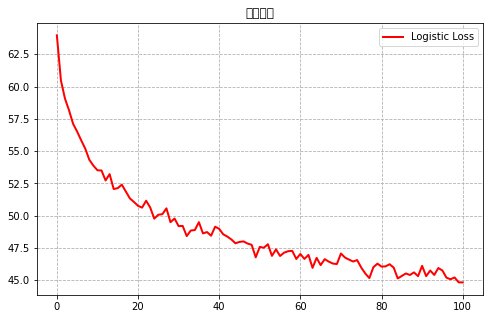

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8958, device='cuda:0')
acc_test_each_k: tensor(0.8958, device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 0, total loss: 45.748580
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 1, total loss: 45.665790
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 2, total loss: 45.425866
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 3, total loss: 45.764501
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 4, total loss: 45.055650
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 5, total loss: 45.031072
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 6, total loss: 45.581346
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 7, total loss: 45.561311
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 8, total loss: 45.027908
total_train_

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 43.617738
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 43.304115
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 87, total loss: 43.807547
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 88, total loss: 43.963494
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 43.524831
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 43.604668
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 43.481673
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 43.109786
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 43.547869
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.967091
total_train_accuracy: tensor(0.9646, dev

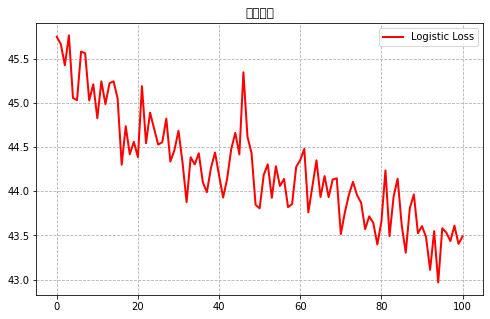

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 43.915245
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 43.970001
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 2, total loss: 43.638150
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 3, total loss: 43.704514
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 43.484267
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 43.771277
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 43.504962
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.579084
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 43.240274
total_train_

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 43.016186
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 86, total loss: 43.848481
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 43.135556
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 88, total loss: 43.133083
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 43.360039
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 90, total loss: 43.605207
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 43.032098
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.842437
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 43.086515
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 43.176183
total_train_accuracy: tensor(0.9667, dev

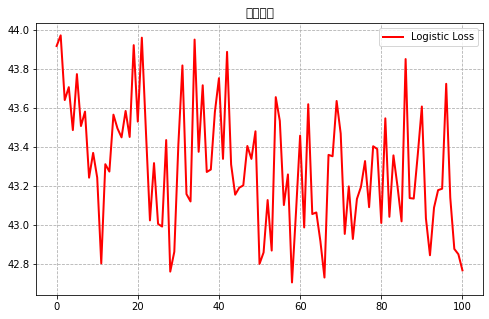

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 43.281070
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 1, total loss: 43.563764
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.773771
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 43.073687
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 43.173173
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 43.166651
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.351875
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.321581
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.964371
total_train_

total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 85, total loss: 43.517506
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.873688
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.910654
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.980433
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 43.366295
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.825181
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.473887
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.689334
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 43.160116
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 43.088834
total_train_accuracy: tensor(0.9646, dev

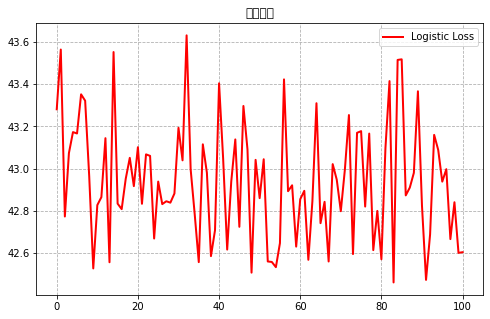

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.072159
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 43.011904
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 2, total loss: 43.434377
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 43.012791
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.848908
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 5, total loss: 43.161110
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 42.988580
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.828969
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.844522
total_train_accuracy

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.801187
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.931672
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.205135
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 89, total loss: 42.351233
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.569383
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.782593
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 92, total loss: 42.453882
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.893843
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.666902
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 95, total loss: 42.372645
total_train_accuracy: tensor(0.9729, dev

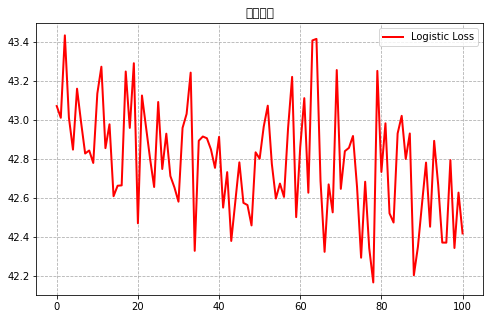

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.152677
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.676204
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.837646
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.705228
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 4, total loss: 43.035423
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.832904
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.711330
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.531615
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.630162
total_train_

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.759016
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.848172
total_train_accuracy: tensor(0.9938, device='cuda:0')
Training Epoch: 87, total loss: 42.117484
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.754381
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.504637
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.331855
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.507735
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 92, total loss: 42.359788
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 42.801942
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.391003
total_train_accuracy: tensor(0.9646, dev

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 42.916513
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.654593
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.511243
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 3, total loss: 42.881465
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.633654
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.541766
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.421531
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.596900
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.734038
total_train_accuracy

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 85, total loss: 42.450629
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.500807
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.727743
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.393818
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 89, total loss: 42.057644
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 42.973064
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.613589
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.335537
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 93, total loss: 42.580811
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.208265
total_train_accuracy: tensor(0.9667, dev

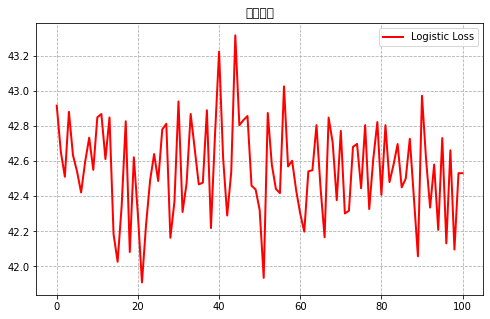

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 0, total loss: 42.813056
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.422077
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.390916
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 43.005792
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.559321
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.628793
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.704182
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.556352
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.677683
total_train_accuracy

total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 85, total loss: 42.185710
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.577278
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 87, total loss: 42.111081
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 88, total loss: 42.015253
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.144813
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 42.860063
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.668532
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.387181
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 42.680271
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.417413
total_train_accuracy: tensor(0.9583, dev

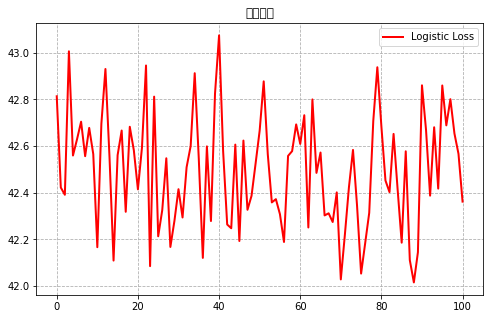

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 42.942029
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.720057
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.638238
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 3, total loss: 42.158927
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.383425
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.500681
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.408076
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 42.659038
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.529822
total_train_accuracy

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.574101
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.338593
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.678333
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.469780
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.547004
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.890023
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.537330
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.439758
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 42.843553
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 43.007924
total_train_accuracy: tensor(0.9500, dev

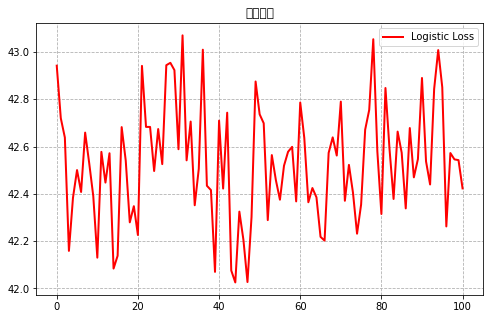

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.907257
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 1, total loss: 42.638308
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.520628
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.467412
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.324540
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.387279
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.194874
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 7, total loss: 41.963279
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.674268
total_train_accuracy

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.233156
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 42.597095
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 87, total loss: 42.587435
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.521193
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 42.762012
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 41.965071
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.098208
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.507491
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.511679
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.031087
total_train_accuracy: tensor(0.9813, dev

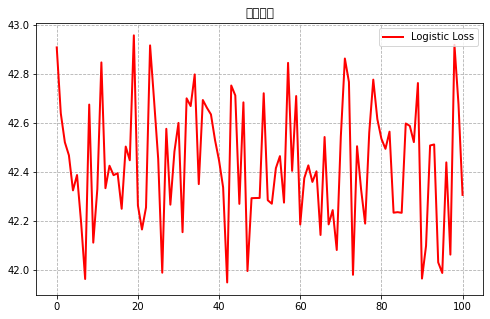

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
[tensor(0.8958, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0')]
[array(0.8958334, dtype=float32), array(0.9375, dtype=float32), array(0.9375, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32)]
acc_test_metrics: 0.9729167


In [7]:
#train model with new features of 94
model=model3
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLPy_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLPy_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/ConvMLPy_NFM_20/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP3(
  (bn0): BatchNorm1d(99, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=99, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 100
f1_score:  %.4f 0.875647692445253
accuracy_score: 0.8768115942028986
recall_score: 0.8730936819172113
pre_recall: 0.8948454595513419
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

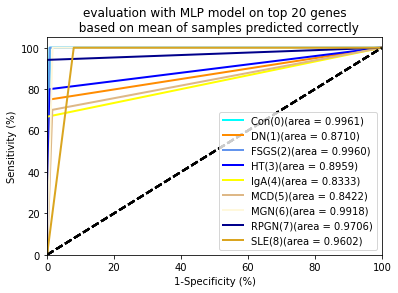

In [11]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/ConvMLPy_NFM_20/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP3()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/ConvMLPy_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [13]:
#for 20_genes
#MLP and ConvMLPy interaction top20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/ConvMLPy/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['PTP4A1', 'EEF1AKMT3', 'KLF6', 'NR0B2', 'ADPRM', 'RHOB', 'GDF15', 'PCK1']
intersecion_list: ['CTSG', 'UCHL1', 'LHPP', 'CHP1', 'ZNHIT1', 'RGS5', 'AGL', 'MEST', 'CYP2J2', 'RPS27L']
intersecion_list: ['TTC3', 'ACVR1B', 'COX15', 'CTTN', 'ACP6', 'VTCN1', 'MEST', 'METTL9', 'VDR', 'MRPS15', 'ISCU', 'CFLAR', 'TRA2A', 'ACTA2']
intersecion_list: ['VAMP8', 'KLF6', 'SLC3A2', 'ATP5IF1', 'ENPP2', 'TESC', 'FST', 'ATP6V1F', 'PCK1', 'GEMIN6']
intersecion_list: ['TMEM100', 'LARP1', 'WASHC3', 'ITGB3BP', 'LYPLA1', 'GLB1L']
intersecion_list: ['ADM2', 'OVOL2', 'LIPC', 'ATP5IF1', 'UBXN8', 'MRPS16', 'COL4A3BP', 'PTMS', 'EPM2AIP1', 'RRM2']
intersecion_list: ['ATP6V0E2', 'UCHL1', 'BDKRB2', 'NDUFB1', 'ADI1', 'PLIN3', 'WARS2', 'ACAD10', 'SPI1', 'NUDT4', 'ABHD2', 'RGN']
intersecion_list: ['GPX2', 'CGREF1', 'CFB', 'ANKRD2', 'SH3BP2', 'UGDH', 'ATP6V1F', 'ABCC3', 'BCCIP']
intersecion_list: ['NDUFA13', 'HERC5', 'GPX3', 'IFIT1', 'TRIM14', 'IFI6', 'DEPTOR', 'IFI44L']


In [14]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_test_info.csv')



81
columns: ['VAMP8', 'ATP6V0E2', 'LIPC', 'SH3BP2', 'ATP5IF1', 'UBXN8', 'TESC', 'GDF15', 'LYPLA1', 'ABCC3', 'TMEM100', 'LHPP', 'ANKRD2', 'BDKRB2', 'CTTN', 'EEF1AKMT3', 'NR0B2', 'AGL', 'SLC3A2', 'WARS2', 'GPX2', 'ADPRM', 'MRPS16', 'TRIM14', 'UGDH', 'ABHD2', 'GLB1L', 'TRA2A', 'PCK1', 'ADM2', 'CGREF1', 'OVOL2', 'ACVR1B', 'RGS5', 'ITGB3BP', 'MEST', 'ISCU', 'FST', 'EPM2AIP1', 'ATP6V1F', 'RGN', 'DEPTOR', 'COX15', 'NDUFB1', 'ADI1', 'KLF6', 'PLIN3', 'GPX3', 'RHOB', 'IFIT1', 'CYP2J2', 'CFLAR', 'PTMS', 'RPS27L', 'TTC3', 'CHP1', 'HERC5', 'ACAD10', 'VDR', 'MRPS15', 'GEMIN6', 'IFI44L', 'CFB', 'LARP1', 'ZNHIT1', 'VTCN1', 'ENPP2', 'SPI1', 'NUDT4', 'ACTA2', 'CTSG', 'UCHL1', 'PTP4A1', 'ACP6', 'WASHC3', 'NDUFA13', 'METTL9', 'COL4A3BP', 'IFI6', 'RRM2', 'BCCIP', 'label']
(549, 82)
(138, 82)


549 82
549 82


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:531: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2583, device='cuda:0')
Training Epoch: 0, total loss: 64.139934
total_train_accuracy: tensor(0.4750, device='cuda:0')
Training Epoch: 1, total loss: 60.931369
total_train_accuracy: tensor(0.5833, device='cuda:0')
Training Epoch: 2, total loss: 59.291390
total_train_accuracy: tensor(0.6333, device='cuda:0')
Training Epoch: 3, total loss: 58.422979
total_train_accuracy: tensor(0.6729, device='cuda:0')
Training Epoch: 4, total loss: 57.412169
total_train_accuracy: tensor(0.6833, device='cuda:0')
Training Epoch: 5, total loss: 57.032259
total_train_accuracy: tensor(0.6729, device='cuda:0')
Training Epoch: 6, total loss: 56.672134
total_train_accuracy: tensor(0.7604, device='cuda:0')
Training Epoch: 7, total loss: 54.733006
total_train_accuracy: tensor(0.7604, device='cuda:0')
Training Epoch: 8, total loss: 54.708371
total_train_accuracy: tensor(0.7521, device='cuda:0')
Training Epoch: 9, total loss: 54.476763
total_train_accuracy: tensor(0.8083, device='cuda:

total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 86, total loss: 45.992920
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 87, total loss: 46.006451
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 88, total loss: 46.495011
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 89, total loss: 46.070149
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 90, total loss: 46.163087
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 91, total loss: 45.572697
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 92, total loss: 45.774371
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 93, total loss: 45.498306
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 45.419648
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 95, total loss: 45.337660
total_train_accuracy: tensor(0.9333, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

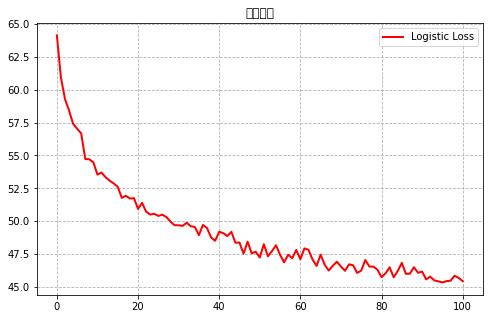

test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 82


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 82
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 0, total loss: 46.721274
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 1, total loss: 45.726631
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 2, total loss: 45.685686
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 3, total loss: 46.361297
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 4, total loss: 45.893245
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 5, total loss: 45.766732
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 6, total loss: 45.268597
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 7, total loss: 45.418885
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 8, total loss: 45.504490
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 9, total loss: 45.466181
total_train_accuracy: tensor(0.9250, device

total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 86, total loss: 44.077285
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 87, total loss: 44.329723
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 43.777824
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 43.768081
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 90, total loss: 44.214603
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 91, total loss: 44.132532
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 92, total loss: 43.924119
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 93, total loss: 44.360114
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 43.512486
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 95, total loss: 44.179046
total_train_accuracy: tensor(0.9438, dev

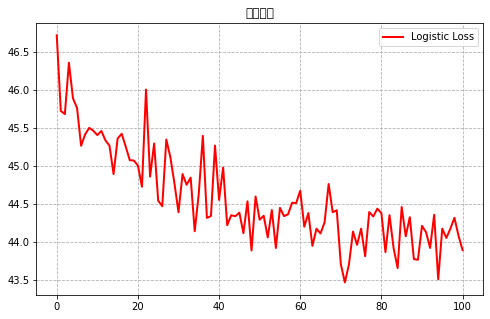

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 0, total loss: 44.341505
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 1, total loss: 44.651531
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 2, total loss: 44.516505
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 3, total loss: 43.996087
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 4, total loss: 43.859993
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 43.786852
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 43.257506
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 7, total loss: 43.890267
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 8, total loss: 44.150601
total_train_ac

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.239584
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 43.486493
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.084279
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 88, total loss: 43.505576
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.915091
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 43.350515
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.885911
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 92, total loss: 43.456867
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 43.293597
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 43.090431
total_train_accuracy: tensor(0.9708, dev

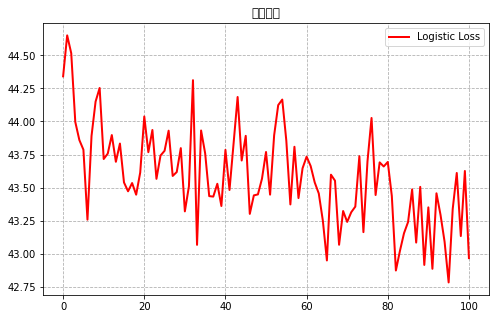

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.713406
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 43.106109
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 43.198839
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.561936
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.299596
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.894256
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.127826
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 43.278764
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 8, total loss: 43.436782
total_train_ac

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.638211
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.583059
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 43.226558
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.867871
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.813304
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 90, total loss: 43.111278
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 91, total loss: 43.308006
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.941578
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.969407
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 94, total loss: 42.965096
total_train_accuracy: tensor(0.9688, dev

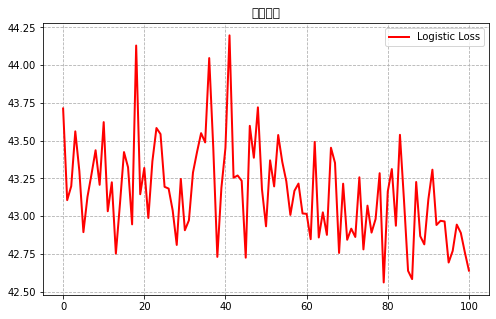

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.379320
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 43.293115
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 2, total loss: 43.541978
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.987007
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.959196
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.858608
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.770566
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 7, total loss: 43.880415
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.759924
total_train_accuracy: 

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 85, total loss: 42.649082
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.939398
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.562243
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.614411
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.912933
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.684309
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 42.782760
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.850123
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.515212
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 94, total loss: 43.241655
total_train_accuracy: tensor(0.9667, dev

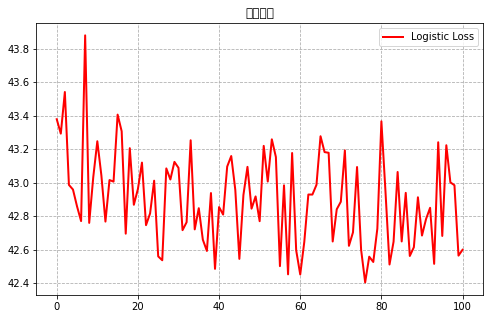

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 43.192525
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.928235
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 43.145074
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 3, total loss: 43.261041
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 43.264518
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 43.047382
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 6, total loss: 43.248618
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 7, total loss: 43.306896
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 8, total loss: 43.422477
total_train_ac

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.815915
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.931157
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 87, total loss: 43.207477
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.754115
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.960581
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.501969
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.736218
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 92, total loss: 43.126808
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 43.390869
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.722877
total_train_accuracy: tensor(0.9667, dev

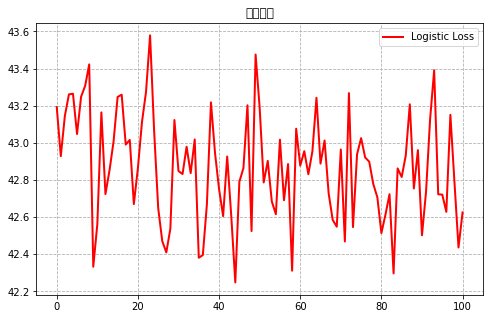

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 0, total loss: 42.777403
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 43.282315
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.898319
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.052337
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.962803
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.755139
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 6, total loss: 42.929046
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.067463
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.917731
total_train_accuracy: 

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.435882
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.459120
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.570636
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 43.227120
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 42.849992
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.735321
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.414438
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 92, total loss: 42.867964
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.730197
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.740509
total_train_accuracy: tensor(0.9708, dev

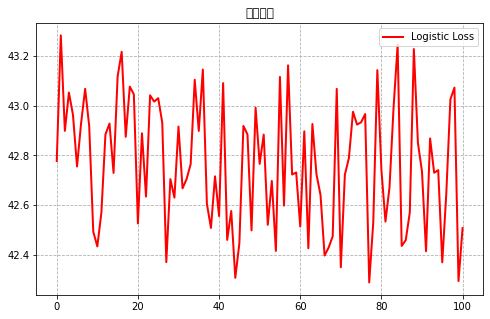

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 0, total loss: 42.683979
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.645096
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 42.682859
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 42.987656
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.634248
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 43.043277
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.762359
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.663628
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 42.978719
total_train_accuracy: 

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 43.003759
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.056356
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.316186
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.571818
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.533106
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.744789
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.756789
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 92, total loss: 43.053275
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 42.958043
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 42.869717
total_train_accuracy: tensor(0.9542, dev

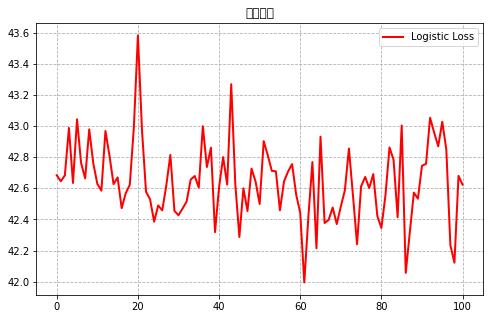

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.812816
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 42.799025
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 43.076908
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.640813
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.909809
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.902852
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.509266
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.685415
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 42.911336
total_train_accuracy: 

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.736735
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 86, total loss: 43.058636
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 87, total loss: 42.845329
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 42.923236
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.674023
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 42.859640
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.644845
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.431571
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 93, total loss: 42.942909
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.191994
total_train_accuracy: tensor(0.9417, dev

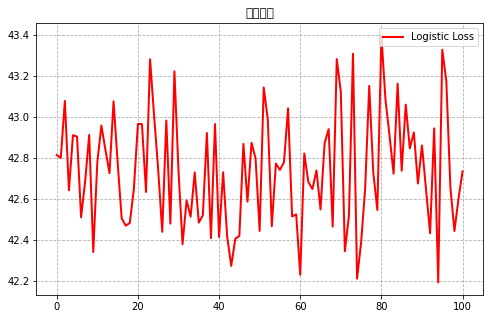

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.894887
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.661659
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.787371
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.551673
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.354350
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.324008
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.662244
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.701547
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.365657
total_train_accuracy: 

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.338316
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.532564
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.520440
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.576579
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 42.635587
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.342519
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 42.652613
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.585747
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.443767
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.556423
total_train_accuracy: tensor(0.9667, dev

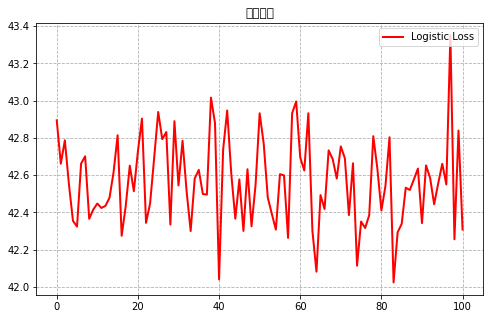

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
[tensor(0.8333, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0')]
[array(0.8333334, dtype=float32), array(0.9375, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32)]
acc_test_metrics: 0.9687501


In [18]:
#train model with new features of 94
model=model4
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvMLPy/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP4(
  (bn0): BatchNorm1d(81, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=81, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 82
f1_score:  %.4f 0.8645077029142478
accuracy_score: 0.8695652173913043
recall_score: 0.8642821231056526
pre_recall: 0.8770412218688081
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

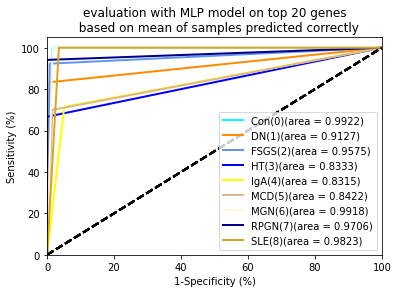

In [19]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLPy/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP4()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [20]:
#for 20_genes
#MLP and ConvMLPy and NFM interaction top20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'
convmlpy_20_path='results_genes/ConvMLPy/contri_20_names_df.csv'

mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')
convmlpy_20_df=pd.read_csv(convmlpy_20_path)

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
convmlpy_20_df=convmlpy_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)
convmlpy_20_np=np.array(convmlpy_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
        convmlpy_data=convmlpy_20_np[i,:].tolist()
        
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)
        convmlpy_set=set(convmlpy_data)
        # 求交集
        intersection1 = mlp_set.intersection(nfm_set)
        intersection=convmlpy_set.intersection(intersection1)
        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['PTP4A1', 'EEF1AKMT3', 'KLF6', 'ADPRM', 'RHOB', 'GDF15', 'PCK1']
intersecion_list: ['CTSG', 'UCHL1', 'LHPP', 'CHP1', 'ZNHIT1', 'RGS5', 'AGL', 'CYP2J2', 'RPS27L']
intersecion_list: ['COX15', 'ACP6', 'VTCN1', 'MEST', 'ISCU', 'METTL9', 'VDR', 'CFLAR', 'TRA2A', 'ACTA2']
intersecion_list: ['VAMP8', 'KLF6', 'SLC3A2', 'TESC', 'FST', 'ATP6V1F', 'PCK1']
intersecion_list: ['TMEM100', 'LARP1', 'WASHC3', 'ITGB3BP', 'LYPLA1']
intersecion_list: ['LIPC', 'ATP5IF1', 'MRPS16', 'COL4A3BP', 'PTMS', 'EPM2AIP1', 'RRM2']
intersecion_list: ['UCHL1', 'BDKRB2', 'NDUFB1', 'PLIN3', 'ADI1', 'WARS2', 'ACAD10', 'SPI1', 'NUDT4', 'ABHD2', 'RGN']
intersecion_list: ['GPX2', 'CGREF1', 'CFB', 'ANKRD2', 'SH3BP2', 'UGDH', 'ATP6V1F', 'ABCC3', 'BCCIP']
intersecion_list: ['NDUFA13', 'HERC5', 'GPX3', 'IFIT1', 'TRIM14', 'IFI6', 'DEPTOR', 'IFI44L']


In [23]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_NFM_test_info.csv')



69
columns: ['VAMP8', 'LIPC', 'COX15', 'SH3BP2', 'NDUFB1', 'ADI1', 'KLF6', 'PLIN3', 'ATP5IF1', 'RHOB', 'TESC', 'GDF15', 'LYPLA1', 'GPX3', 'IFIT1', 'CYP2J2', 'CFLAR', 'PTMS', 'RPS27L', 'ABCC3', 'TMEM100', 'LHPP', 'CHP1', 'BDKRB2', 'ANKRD2', 'EEF1AKMT3', 'HERC5', 'AGL', 'SLC3A2', 'WARS2', 'ACAD10', 'RRM2', 'DEPTOR', 'VDR', 'IFI44L', 'GPX2', 'CFB', 'LARP1', 'ZNHIT1', 'ADPRM', 'VTCN1', 'IFI6', 'MRPS16', 'TRIM14', 'SPI1', 'NUDT4', 'UGDH', 'ABHD2', 'TRA2A', 'PCK1', 'ACTA2', 'CTSG', 'CGREF1', 'UCHL1', 'PTP4A1', 'ACP6', 'RGS5', 'WASHC3', 'ITGB3BP', 'NDUFA13', 'MEST', 'ISCU', 'METTL9', 'COL4A3BP', 'FST', 'EPM2AIP1', 'ATP6V1F', 'RGN', 'BCCIP', 'label']
(549, 70)
(138, 70)


549 70
549 70


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:531: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2771, device='cuda:0')
Training Epoch: 0, total loss: 64.018012
total_train_accuracy: tensor(0.5167, device='cuda:0')
Training Epoch: 1, total loss: 60.739508
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 2, total loss: 59.115286
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 3, total loss: 58.158528
total_train_accuracy: tensor(0.6521, device='cuda:0')
Training Epoch: 4, total loss: 57.719086
total_train_accuracy: tensor(0.6542, device='cuda:0')
Training Epoch: 5, total loss: 57.278191
total_train_accuracy: tensor(0.7313, device='cuda:0')
Training Epoch: 6, total loss: 56.106214
total_train_accuracy: tensor(0.7604, device='cuda:0')
Training Epoch: 7, total loss: 55.313636
total_train_accuracy: tensor(0.7167, device='cuda:0')
Training Epoch: 8, total loss: 55.241089
total_train_accuracy: tensor(0.7646, device='cuda:0')
Training Epoch: 9, total loss: 54.833511
total_train_accuracy: tensor(0.7667, device='cuda:

total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 86, total loss: 46.742158
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 87, total loss: 46.171358
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 88, total loss: 46.311844
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 89, total loss: 46.129127
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 90, total loss: 45.926938
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 91, total loss: 45.560240
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 92, total loss: 45.685682
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 93, total loss: 47.053230
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 94, total loss: 46.228187
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 95, total loss: 46.574523
total_train_accuracy: tensor(0.9063, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


tensor(0.9396, device='cuda:0')
Training Epoch: 100, total loss: 45.270834
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


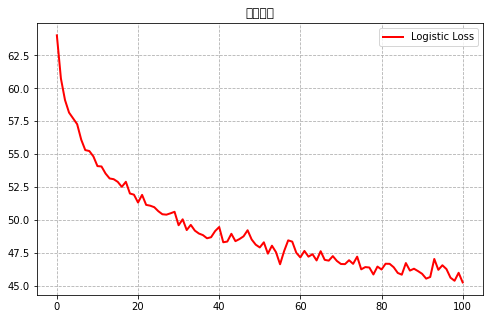

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 0, total loss: 46.365242
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 1, total loss: 46.181069
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 2, total loss: 45.287069
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 3, total loss: 46.257442
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 4, total loss: 45.896821
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 5, total loss: 46.188136
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 6, total loss: 46.178184
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 7, total loss: 45.489533
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 8, total loss: 45.760926
total_train_ac

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.857539
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 86, total loss: 44.069230
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 43.949355
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 88, total loss: 43.727394
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 89, total loss: 43.502587
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 90, total loss: 44.404564
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 43.918228
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 92, total loss: 44.181718
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 93, total loss: 44.234469
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 44.027745
total_train_accuracy: tensor(0.9563, dev

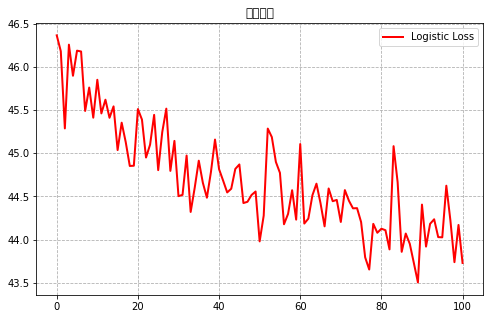

test
test
test
total_test_accuracy: tensor(0.8542, device='cuda:0')
acc_test_each_k: tensor(0.8542, device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 44.567267
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 1, total loss: 44.165332
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 2, total loss: 44.729089
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 3, total loss: 44.425159
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 4, total loss: 43.804684
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 5, total loss: 43.815491
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 43.648382
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 7, total loss: 43.932736
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 8, total loss: 43.760841
total_train_ac

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 43.258615
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 43.345746
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 43.205335
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 88, total loss: 43.824437
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 89, total loss: 43.427719
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.929746
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 43.358343
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.856236
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 43.066558
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 43.048915
total_train_accuracy: tensor(0.9646, dev

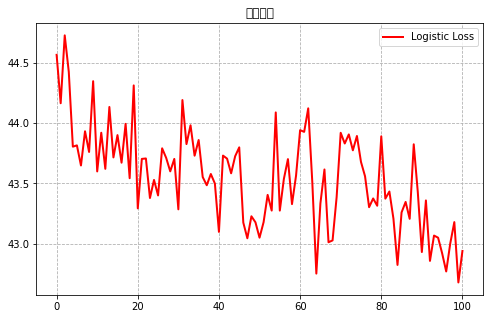

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 0, total loss: 43.691423
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 1, total loss: 43.672994
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 43.344374
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 3, total loss: 43.903037
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 43.303360
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 5, total loss: 44.289988
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.271904
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.738829
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 43.456490
total_train_accuracy: 

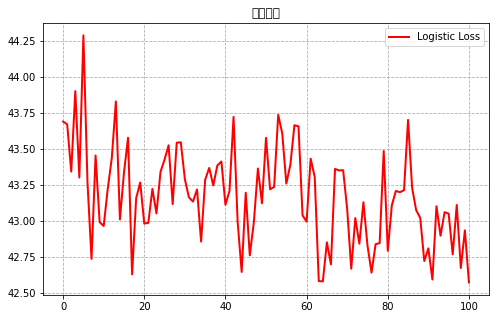

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 43.283417
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 1, total loss: 43.307901
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 43.210523
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.625014
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 4, total loss: 43.267720
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.933908
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.039396
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 42.912818
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 8, total loss: 43.437636
total_train_accuracy: 

total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 85, total loss: 43.083151
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.439883
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.847431
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 43.133690
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.563818
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 90, total loss: 43.841010
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.732012
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.613111
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.644967
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.847709
total_train_accuracy: tensor(0.9583, dev

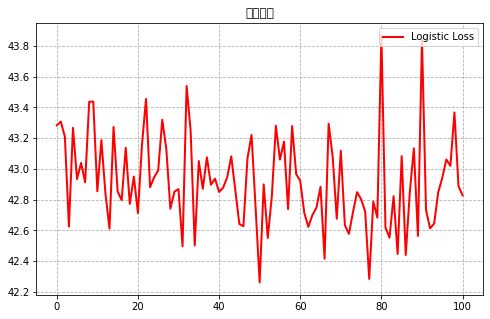

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.120914
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 43.525366
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 43.110750
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 43.072342
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 43.006249
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.617686
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 6, total loss: 43.175176
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 42.991528
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 8, total loss: 43.288029
total_train_ac

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.295888
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.921133
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.512724
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 3, total loss: 42.293563
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 42.833275
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 5, total loss: 43.094266
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 42.978979
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.372193
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 8, total loss: 42.955504
total_train_accuracy: 

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.130679
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 42.762814
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.540123
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.759915
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.460862
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.644826
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.510232
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 42.903655
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.909276
total_train_accuracy: 

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 42.569948
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 87, total loss: 42.872773
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 43.110637
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 43.039054
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 43.058560
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.359888
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.589039
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 93, total loss: 42.211416
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.702519
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 95, total loss: 42.697455
total_train_accuracy: tensor(0.9542, dev

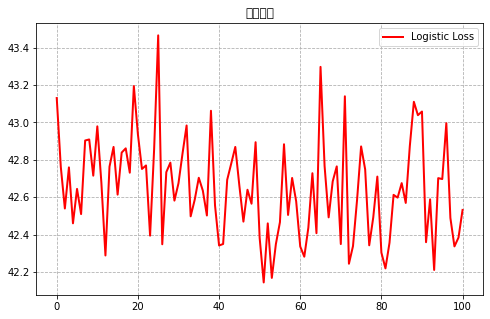

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 42.985122
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 1, total loss: 42.993695
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.813482
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.032353
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.965435
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.860628
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.596344
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.661388
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 8, total loss: 42.532364
total_train_accuracy: 

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.518215
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.544649
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 87, total loss: 42.000091
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 88, total loss: 42.110721
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 89, total loss: 42.170308
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 42.687252
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 42.985588
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.653464
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.484434
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.270553
total_train_accuracy: tensor(0.9708, dev

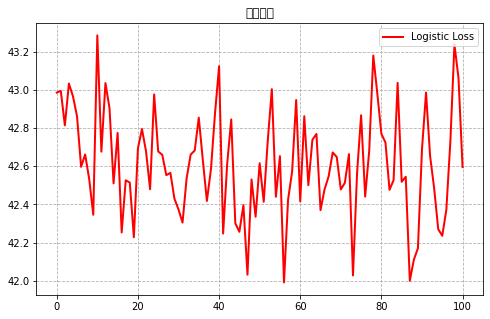

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 0, total loss: 42.290823
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 1, total loss: 43.202170
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 2, total loss: 42.759431
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.665099
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.541274
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.667285
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.412379
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.472479
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 8, total loss: 42.297251
total_train_accuracy: 

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.559583
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.563944
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.403213
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 89, total loss: 43.231969
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.698540
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.243176
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.711686
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.313319
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.748400
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 95, total loss: 42.697672
total_train_accuracy: tensor(0.9667, dev

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8333, device='cuda:0'), tensor(0.8542, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8333334, dtype=float32), array(0.8541667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9666667


In [4]:
#train model with new features of 94
model=model5
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvMLPy_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


In [6]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLPy_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP5()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



MLP5(
  (bn0): BatchNorm1d(69, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=69, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 70
f1_score:  %.4f 0.8903070957622629
accuracy_score: 0.8913043478260869
recall_score: 0.8955804544039838
pre_recall: 0.8939450527685823
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

MLP5(
  (bn0): BatchNorm1d(69, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=69, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 70
f1_score:  %.4f 0.8903070957622629
accuracy_score: 0.8913043478260869
recall_score: 0.8955804544039838
pre_recall: 0.8939450527685823
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

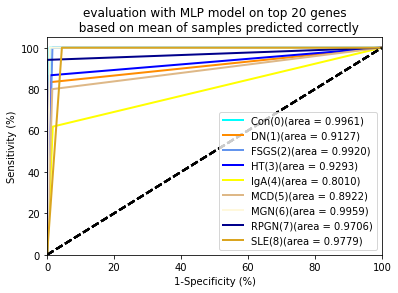

In [7]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLPy_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP5()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [27]:
#for 20_genes
#MLP and ConvMLPy and NFM interaction top20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/intersections/MLP_ConvMLPy_genes_intersections_20.csv'
nfm_layer_20_path='results_genes/intersections/ConvMLPy_NFM_genes_intersections_20.csv'
convmlpy_20_path='results_genes/intersections/genes_intersections_20.csv'

mlp_20_df=pd.read_csv(mlp_20_path,sep=',')


#
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

convmlpy_20_df=pd.read_csv(convmlpy_20_path)

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
#print('mlp_20_df:',mlp_20_df)
mlp_20_columns=mlp_20_df.columns.tolist()
#print(mlp_20_columns)
nfm_layer_20_columns=nfm_layer_20_df.iloc[:,1:].columns.tolist()
convmlpy_20_columns=convmlpy_20_df.iloc[:,1:].columns.tolist()


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_union_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    
        
    # 将列表转换为集合
    mlp_set = set(mlp_20_columns)
    nfm_set = set(nfm_layer_20_columns)
    convmlpy_set=set(convmlpy_20_columns)
    # 求交集
    intersection1 = mlp_set.union(nfm_set)
    intersection=convmlpy_set.union(intersection1)
    # 将交集转换回列表
    intersection_list = list(intersection)
    print('intersecion_list:',intersection_list)
    writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['LIPC', 'TFAP2A', 'UBXN8', 'LYPLA1', 'GDF15', 'CHODL', 'EMX1', 'TMEM100', 'NR0B2', 'SLC3A2', 'FCGBP', 'LGMN', 'WASHC4', 'BHLHE40', 'ABHD2', 'GLB1L', 'FKBP4', 'MAP3K1', 'ADM2', 'ACVR1B', 'MEST', 'WDR12', 'FST', 'EPM2AIP1', 'ABLIM1', 'BTG1', 'COX15', 'OLFML3', 'ADI1', 'GPX3', 'PLIN3', 'CYP2J2', 'CHP1', 'CYP39A1', 'RPL38', 'HERC5', 'ACAD10', 'VDR', 'MRPS15', 'IFI44L', 'UQCR10', 'VTCN1', 'ENPP2', 'ALB', 'WASHC3', 'MT2A', 'COL4A3BP', 'TYMP', 'CAMLG', 'VAMP8', 'ATP6V0E2', 'SH3BP2', 'MS4A4A', 'ELF3', 'ATP5IF1', 'TESC', 'ABCC3', 'LHPP', 'ANKRD2', 'BDKRB2', 'CTTN', 'EEF1AKMT3', 'AGL', 'WARS2', 'TFAM', 'TTC1', 'GPX2', 'FOS', 'ADPRM', 'TRIM14', 'MRPS16', 'TUBA4B', 'UGDH', 'TRA2A', 'PCK1', 'RHBDL1', 'CGREF1', 'CYP21A2', 'OVOL2', 'CHCHD3', 'CPVL', 'RGS5', 'ITGB3BP', 'OXCT1', 'ISCU', 'ATP6V1F', 'DEPTOR', 'RGN', 'SERPINF1', 'ECH1', 'NDUFB1', 'KLF6', 'RHOB', 'IFIT1', 'CFLAR', 'PTMS', 'RPS27L', 'NONO', 'TTC3', 'NEAT1', 'ABCB7', 'IGLV2-14', 'GEMIN6', 'CFB', 'LARP1', 'ZNHIT1', 'KLF9', 

In [28]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_union_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_genes_union_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_NFM_union_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_NFM_union_test_info.csv')



119
columns: ['VAMP8', 'ATP6V0E2', 'LIPC', 'SH3BP2', 'MS4A4A', 'ELF3', 'TFAP2A', 'ATP5IF1', 'UBXN8', 'TESC', 'LYPLA1', 'GDF15', 'ABCC3', 'CHODL', 'EMX1', 'TMEM100', 'LHPP', 'ANKRD2', 'BDKRB2', 'CTTN', 'NR0B2', 'EEF1AKMT3', 'SLC3A2', 'AGL', 'WARS2', 'FCGBP', 'LGMN', 'WASHC4', 'TFAM', 'TTC1', 'GPX2', 'FOS', 'BHLHE40', 'ADPRM', 'TRIM14', 'MRPS16', 'TUBA4B', 'UGDH', 'ABHD2', 'GLB1L', 'TRA2A', 'FKBP4', 'PCK1', 'RHBDL1', 'MAP3K1', 'ADM2', 'CGREF1', 'CYP21A2', 'OVOL2', 'CHCHD3', 'ACVR1B', 'CPVL', 'RGS5', 'ITGB3BP', 'OXCT1', 'MEST', 'ISCU', 'WDR12', 'FST', 'EPM2AIP1', 'ATP6V1F', 'DEPTOR', 'RGN', 'SERPINF1', 'ECH1', 'ABLIM1', 'BTG1', 'BCCIP', 'COX15', 'OLFML3', 'NDUFB1', 'ADI1', 'GPX3', 'PLIN3', 'KLF6', 'RHOB', 'IFIT1', 'CYP2J2', 'CFLAR', 'PTMS', 'RPS27L', 'NONO', 'TTC3', 'NEAT1', 'CHP1', 'CYP39A1', 'RPL38', 'HERC5', 'ABCB7', 'ACAD10', 'VDR', 'MRPS15', 'IGLV2-14', 'IFI44L', 'GEMIN6', 'UQCR10', 'CFB', 'LARP1', 'ZNHIT1', 'VTCN1', 'KLF9', 'ENPP2', 'SPI1', 'NUDT4', 'ALB', 'ACTA2', 'CTSG', 'UCHL1', 

549 120
549 120


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:531: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2729, device='cuda:0')
Training Epoch: 0, total loss: 63.995991
total_train_accuracy: tensor(0.5167, device='cuda:0')
Training Epoch: 1, total loss: 60.887007
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 2, total loss: 58.765808
total_train_accuracy: tensor(0.6583, device='cuda:0')
Training Epoch: 3, total loss: 57.514741
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 4, total loss: 56.116668
total_train_accuracy: tensor(0.7375, device='cuda:0')
Training Epoch: 5, total loss: 56.098042
total_train_accuracy: tensor(0.7771, device='cuda:0')
Training Epoch: 6, total loss: 54.929514
total_train_accuracy: tensor(0.7729, device='cuda:0')
Training Epoch: 7, total loss: 54.793192
total_train_accuracy: tensor(0.7917, device='cuda:0')
Training Epoch: 8, total loss: 54.275839
total_train_accuracy: tensor(0.7854, device='cuda:0')
Training Epoch: 9, total loss: 53.622114
total_train_accuracy: tensor(0.8167, device='cuda:

total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 86, total loss: 45.672251
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 87, total loss: 45.382767
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 88, total loss: 45.020265
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 44.710364
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 90, total loss: 45.149127
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 91, total loss: 45.083055
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 92, total loss: 45.568733
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 93, total loss: 45.662867
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 94, total loss: 45.360006
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 95, total loss: 45.103551
total_train_accuracy: tensor(0.9438, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 120


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 120
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 0, total loss: 45.852353
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 1, total loss: 45.412637
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 2, total loss: 45.464145
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 3, total loss: 45.746171
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 4, total loss: 45.384034
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 5, total loss: 45.203825
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 6, total loss: 45.541455
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 7, total loss: 45.269251
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 8, total loss: 44.780692
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 9, total loss: 44.935565
total_train_accuracy: tensor(0.9479, devic

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 43.496014
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 87, total loss: 44.060271
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 43.685852
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 43.421827
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 43.903137
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 43.594520
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 92, total loss: 43.830322
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 43.428622
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 94, total loss: 44.381701
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 95, total loss: 43.605980
total_train_accuracy: tensor(0.9583, dev

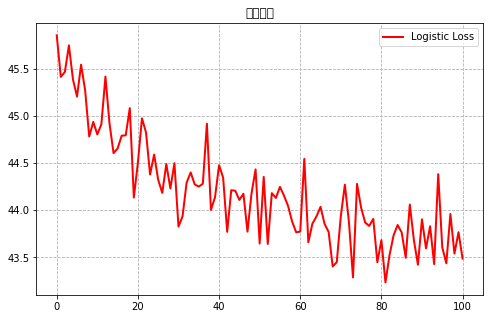

test
test
test
total_test_accuracy: tensor(0.8750, device='cuda:0')
acc_test_each_k: tensor(0.8750, device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.649145
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 1, total loss: 43.908542
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.455834
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 3, total loss: 43.913821
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 43.210893
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 5, total loss: 43.453998
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 6, total loss: 44.087477
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 7, total loss: 43.598421
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 43.572991
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 43.343225
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.200516
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 88, total loss: 43.391656
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 43.018465
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.819045
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 43.356461
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.582179
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.847617
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 43.307282
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 95, total loss: 42.977230
total_train_accuracy: tensor(0.9708, dev

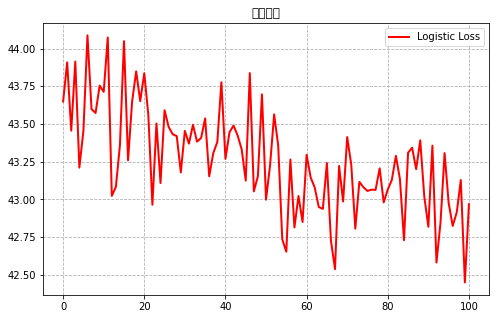

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 43.016135
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 43.178431
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 2, total loss: 42.692108
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 3, total loss: 42.686254
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.201611
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.895846
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 6, total loss: 43.452321
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 43.015222
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.890596
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 43.125781
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.765108
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.687009
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.784034
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 43.104775
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.915870
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.945007
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.117420
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.544101
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.561414
total_train_accuracy: tensor(0.9625, dev

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 43.106040
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.832884
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.925255
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.777464
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.026853
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.997386
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.722647
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.832899
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 43.369445
total_train_accuracy

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.989232
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.507242
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 87, total loss: 42.294683
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.245143
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.602193
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.277112
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.375880
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.947416
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 93, total loss: 42.358744
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.351667
total_train_accuracy: tensor(0.9792, dev

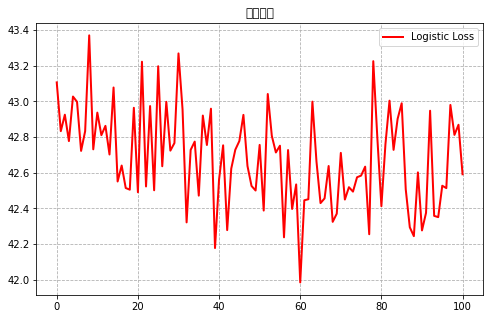

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 0, total loss: 43.380931
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.763021
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.806933
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.570863
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.603788
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.610424
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 6, total loss: 42.504914
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.679935
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.554345
total_train_

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 85, total loss: 42.531284
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.197348
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 87, total loss: 42.299888
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.206547
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.374599
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.857380
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.360834
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.630282
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.444875
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.134826
total_train_accuracy: tensor(0.9771, dev

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.505550
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 42.811063
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.530773
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 3, total loss: 42.482193
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 4, total loss: 42.355999
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.523358
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.675773
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.878813
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.517876
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.257737
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.499067
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.635779
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.462863
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.082814
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.471693
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.496312
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.294354
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 93, total loss: 42.234738
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.876297
total_train_accuracy: tensor(0.9729, dev

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.487568
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 42.807816
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.305722
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.471437
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.356915
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 5, total loss: 41.934358
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.211450
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 7, total loss: 42.257571
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.484186
total_train_accuracy

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.496057
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.301447
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.135447
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 42.838856
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 90, total loss: 42.128760
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.399589
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.379789
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.215507
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 94, total loss: 42.136543
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 95, total loss: 42.262189
total_train_accuracy: tensor(0.9729, dev

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.537030
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.322610
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.559453
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.914088
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 4, total loss: 42.266584
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.464093
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.247554
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.173144
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.764863
total_train_accuracy

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.180507
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 42.544845
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.722668
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.416910
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.247629
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.428498
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 91, total loss: 42.178442
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 92, total loss: 42.227502
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 93, total loss: 42.375682
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.538017
total_train_accuracy: tensor(0.9708, dev

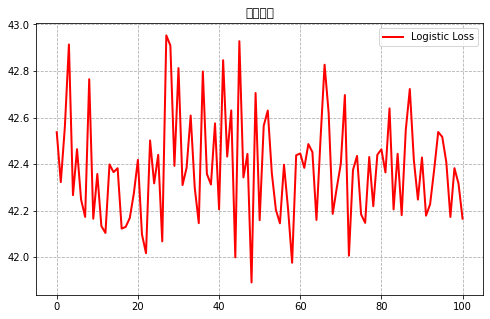

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 0, total loss: 42.183329
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 1, total loss: 42.216137
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.085500
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 3, total loss: 41.914240
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 4, total loss: 41.984681
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.797336
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.242973
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.833577
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.785377
total_train_accuracy

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 85, total loss: 42.309027
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.631601
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.548259
total_train_accuracy: tensor(0.9958, device='cuda:0')
Training Epoch: 88, total loss: 41.984815
total_train_accuracy: tensor(0.9958, device='cuda:0')
Training Epoch: 89, total loss: 41.842689
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.593163
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.253735
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.176654
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.470070
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.433865
total_train_accuracy: tensor(0.9875, dev

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8333, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8333334, dtype=float32), array(0.875, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9666667


In [30]:
#train model with new features of 94
model=model6
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_union_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_union_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/union_three/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP6(
  (bn0): BatchNorm1d(119, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=119, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 120
f1_score:  %.4f 0.8744328140612969
accuracy_score: 0.8768115942028986
recall_score: 0.8709772798008092
pre_recall: 0.895694716064098
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

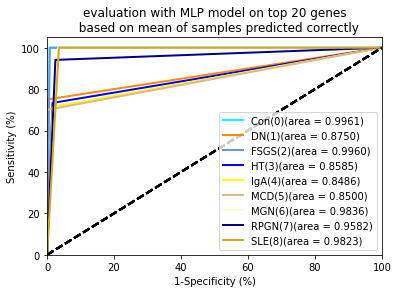

In [10]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/union_three/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP6()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_union_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

